<a href="https://colab.research.google.com/github/JorgeJC84/data-science-portfolio/blob/main/Modelos_avanzados_y_redes_neuronales_Jorge_Jeria.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 🧠 Clasificación de Noticias Falsas y Predicción de Popularidad de Artículos con Modelos Avanzados y Redes Neuronales

## 📌 Introducción
La propagación de noticias falsas representa un desafío significativo en la era digital, afectando la percepción pública y la confianza en los medios. Por otro lado, predecir el impacto de una noticia en redes sociales es clave para estrategias de contenido. En este proyecto se aplican modelos avanzados de aprendizaje automático y redes neuronales profundas para abordar ambos problemas: la detección de noticias falsas y la predicción de cuántas veces un artículo será compartido.

## 🎯 Objetivos
- Implementar una red neuronal recurrente (LSTM) para clasificar noticias como verdaderas o falsas.
- Utilizar un modelo de Word Embedding preentrenado (Word2Vec) para representar semánticamente los textos.
- Limpiar y analizar datos de artículos compartidos online para predecir su popularidad.
- Entrenar y comparar modelos de Machine Learning: Random Forest, Redes Neuronales Fully Connected, XGBoost y Bagging heterogéneo.
- Evaluar el rendimiento de los modelos con métricas adecuadas y visualizar resultados.



## 🛠️ Instalación y carga de librerías necesarias

A continuación, se instalan y cargan las principales librerías para procesamiento de texto, modelado de datos, redes neuronales, visualización y evaluación de modelos. También se configura el entorno para utilizar Google Word2Vec y el archivo auxiliar para bagging heterogéneo.


### 🔁 Reinstalación de `numpy` y `gensim` en versiones compatibles

Para evitar errores de compatibilidad entre bibliotecas como `TensorFlow`, `gensim` y `numpy`, se fuerza la reinstalación de versiones específicas.


In [1]:
# Reinstalación de numpy y gensim en versión compatible con tensorflow
!pip install numpy==1.26.4 gensim==4.3.2 --force-reinstall --quiet


ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
opencv-python-headless 4.12.0.88 requires numpy<2.3.0,>=2; python_version >= "3.9", but you have numpy 1.26.4 which is incompatible.
thinc 8.3.6 requires numpy<3.0.0,>=2.0.0, but you have numpy 1.26.4 which is incompatible.
plotnine 0.14.6 requires scipy<1.16.0,>=1.8.0, but you have scipy 1.16.0 which is incompatible.


### 🔁 Reinstalación de `scipy` en versión compatible

Para resolver errores de compatibilidad con algunas librerías de procesamiento numérico, se reinstala `scipy` en una versión específica.

In [2]:
!pip install scipy==1.10.1 --force-reinstall --quiet


ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
opencv-python-headless 4.12.0.88 requires numpy<2.3.0,>=2; python_version >= "3.9", but you have numpy 1.26.4 which is incompatible.
thinc 8.3.6 requires numpy<3.0.0,>=2.0.0, but you have numpy 1.26.4 which is incompatible.
jaxlib 0.5.1 requires scipy>=1.11.1, but you have scipy 1.10.1 which is incompatible.
cvxpy 1.6.7 requires scipy>=1.11.0, but you have scipy 1.10.1 which is incompatible.
jax 0.5.2 requires scipy>=1.11.1, but you have scipy 1.10.1 which is incompatible.
tsfresh 0.21.0 requires scipy>=1.14.0; python_version >= "3.10", but you have scipy 1.10.1 which is incompatible.
xarray-einstats 0.9.1 requires scipy>=1.11, but you have scipy 1.10.1 which is incompatible.
scikit-image 0.25.2 requires scipy>=1.11.4, but you have scipy 1.10.1 which is incompatible.


### 📦 Instalación de librerías necesarias y recursos de NLP

Esta celda instala las bibliotecas esenciales para el procesamiento de texto y modelos avanzados, sin modificar `numpy` ni `scipy`.


In [3]:
# Instala todo lo necesario (sin tocar numpy ni scipy)
!pip install gensim==4.3.2 wordcloud xgboost --quiet

# Descarga recursos adicionales
import nltk
nltk.download('punkt')


[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

Este mensaje indica que el tokenizador `punkt` ha sido descargado correctamente en el entorno de ejecución. Este recurso es necesario para dividir textos en oraciones o palabras, una tarea común en procesamiento de lenguaje natural (NLP).


### 🔧 Importación de módulo auxiliar `util_bagging.py`

Se importa el archivo `util_bagging.py` con funciones personalizadas para implementar modelos de Bagging heterogéneo.

In [4]:
from google.colab import files
files.upload()  # Selecciona 'util_bagging.py' desde tu equipo

import util_bagging as ubagging


Saving util_bagging.py to util_bagging (1).py


In [5]:
!pip install --upgrade scipy gensim



  Using cached scipy-1.16.0-cp311-cp311-manylinux2014_x86_64.manylinux_2_17_x86_64.whl.metadata (61 kB)
  Using cached gensim-4.3.3-cp311-cp311-manylinux_2_17_x86_64.manylinux2014_x86_64.whl.metadata (8.1 kB)
  Using cached scipy-1.13.1-cp311-cp311-manylinux_2_17_x86_64.manylinux2014_x86_64.whl.metadata (60 kB)
Using cached gensim-4.3.3-cp311-cp311-manylinux_2_17_x86_64.manylinux2014_x86_64.whl (26.7 MB)
Using cached scipy-1.13.1-cp311-cp311-manylinux_2_17_x86_64.manylinux2014_x86_64.whl (38.6 MB)
  Attempting uninstall: scipy
    Found existing installation: scipy 1.10.1
    Uninstalling scipy-1.10.1:
      Successfully uninstalled scipy-1.10.1
  Attempting uninstall: gensim
    Found existing installation: gensim 4.3.2
    Uninstalling gensim-4.3.2:
      Successfully uninstalled gensim-4.3.2
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
tsfresh 0.21.0 requ

In [133]:
# ========================================
# 🔢 Manejo y análisis de datos
# ========================================
import pandas as pd                     # Estructuras tipo DataFrame
import numpy as np                      # Cálculos numéricos y arrays

# ========================================
# 📊 Visualización de datos
# ========================================
import matplotlib.pyplot as plt         # Gráficos básicos
import seaborn as sns                   # Gráficos estadísticos

# ========================================
# 🧹 Limpieza y manejo de texto
# ========================================
import re                               # Expresiones regulares
import string                           # Utilidades de texto
import warnings                         # Manejo de advertencias
warnings.filterwarnings('ignore')       # Ignorar advertencias para evitar ruido en la salida

# ========================================
# 📖 Procesamiento de Lenguaje Natural (NLP)
# ========================================
from nltk.tokenize import word_tokenize     # Tokenización con NLTK
from gensim.models import KeyedVectors      # Modelos Word2Vec preentrenados
from wordcloud import WordCloud             # Nubes de palabras

# ========================================
# 🧠 Redes neuronales con Keras (Deep Learning)
# ========================================
from tensorflow.keras.models import Sequential                        # Modelo secuencial de Keras
from tensorflow.keras.layers import Embedding, LSTM, Dense, Dropout   # Capas para modelos profundos
from tensorflow.keras.preprocessing.text import Tokenizer             # Texto a secuencia numérica
from tensorflow.keras.preprocessing.sequence import pad_sequences     # Padding para secuencias
from tensorflow.keras.callbacks import EarlyStopping                  # Detener entrenamiento temprano

# ========================================
# ⚙️ Machine Learning tradicional y evaluación
# ========================================
from sklearn.model_selection import train_test_split, GridSearchCV     # División de datos y búsqueda de hiperparámetros
from sklearn.ensemble import RandomForestRegressor                      # Modelo de Random Forest para regresión
from sklearn.preprocessing import LabelEncoder, MinMaxScaler           # Codificación y normalización
from sklearn.metrics import (classification_report, confusion_matrix,  # Reportes y matrices para clasificación
                             roc_curve, auc,                            # Curva ROC y AUC
                             mean_squared_error, r2_score)              # Métricas de regresión

# ========================================
# 🚀 Modelos avanzados de boosting
# ========================================
import xgboost as xgb                             # Importar XGBoost completo
from xgboost import XGBRegressor, plot_importance # Regresor y visualización de importancia

# ========================================
# 🧪 Otros útiles
# ========================================
from sklearn.utils import resample        # Muestreo aleatorio (bootstrapping)
from math import sqrt                     # Raíz cuadrada para RMSE
import gdown                              # Descargar archivos desde Google Drive por ID o URL

# ========================================
# ⏱️ Paralelización y progreso
# ========================================
from contextlib import contextmanager      # Crear contextos personalizados con 'with'
from joblib import Parallel, parallel_backend  # Ejecución paralela
from tqdm.notebook import tqdm             # Barra de progreso para notebooks
from IPython.display import display        # Mostrar contenido interactivo
import ipywidgets                          # Widgets interactivos (como sliders o barras)


✅ Paso 1: Carga de news1.csv, conteo de clases y exploración de frecuencias

### 📂 Montaje de Google Drive

Para acceder a los archivos almacenados en Google Drive desde el entorno de Google Colab, es necesario montar la unidad. Esto permite cargar datasets, modelos preentrenados o scripts auxiliares directamente desde el almacenamiento en la nube.

El siguiente comando monta la unidad de Drive en el entorno:


In [2]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


### 📁 Definición de la ruta de trabajo en Google Drive

Una vez montado Google Drive, es necesario definir la ruta hacia la carpeta que contiene los archivos del proyecto.

En este caso, se establece una variable `folder_path` que apunta a la carpeta principal del proyecto ubicada dentro de `MyDrive`:


In [3]:
# Ruta a tu carpeta dentro de Google Drive
folder_path = '/content/drive/MyDrive/prueba-redes-neuronales'

### 📊 Carga del dataset y conteo de clases

A continuación, se carga el archivo `news1.csv` directamente desde la carpeta de trabajo en Google Drive, utilizando la variable `folder_path` previamente definida. Este archivo contiene artículos etiquetados como reales (`REAL`) o falsos (`FAKE`).


In [4]:
df_news = pd.read_csv(f'{folder_path}/news1.csv', sep=',', on_bad_lines='skip')
print("Columnas detectadas:", df_news.columns)
df_news.head()


Columnas detectadas: Index(['Unnamed: 0.1', 'Unnamed: 0', 'title', 'text', 'label'], dtype='object')


,Unnamed: 0.1,Unnamed: 0,title,text,label
0,0,8476,You Can Smell Hillary’s Fear,"Daniel Greenfield, a Shillman Journalism Fello...",FAKE
1,1,10294,Watch The Exact Moment Paul Ryan Committed Pol...,Google Pinterest Digg Linkedin Reddit Stumbleu...,FAKE
2,2,3608,Kerry to go to Paris in gesture of sympathy,U.S. Secretary of State John F. Kerry said Mon...,REAL
3,3,10142,Bernie supporters on Twitter erupt in anger ag...,"— Kaydee King (@KaydeeKing) November 9, 2016 T...",FAKE
4,4,875,The Battle of New York: Why This Primary Matters,It's primary day in New York and front-runners...,REAL


In [5]:
# Cargar desde Drive
df_news = pd.read_csv(f'{folder_path}/news1.csv')

# Conteo por clase
conteo = df_news['label'].value_counts()
print("Conteo por clase:\n", conteo)

Conteo por clase:
 label
FAKE                                                                                                                                      3186
REAL                                                                                                                                      3154
 we have now learned that they don’t even share the same religion.                                                                           2
 usually sex-related. It also involves at least minor sacrifices: one “recipe” calls for cutting one’s figure and “eat[ing] the pain.”       2
Name: count, dtype: int64


### ⚠️ Revisión y limpieza de etiquetas inválidas

Al revisar el conteo de valores en la columna `label`, se detectó que algunas etiquetas no corresponden a las categorías válidas (`FAKE`, `REAL`). Estas etiquetas erróneas son frases completas, probablemente introducidas por error durante la creación o carga del dataset.

Es necesario filtrar el DataFrame para conservar únicamente las instancias cuya etiqueta esté dentro del conjunto válido de clases.

### 🧹 Limpieza de etiquetas no válidas

Durante la inspección del conjunto de datos, se detectaron algunas filas en la columna `label` que no corresponden a las categorías esperadas (`FAKE` o `REAL`). Para asegurar la correcta clasificación binaria y evitar errores durante el entrenamiento del modelo, se eliminaron aquellas observaciones cuya etiqueta no pertenezca a estas dos clases válidas.


In [6]:
# Eliminar filas que no sean FAKE o REAL
df_news = df_news[df_news['label'].isin(['FAKE', 'REAL'])]


### 🔢 Conversión de etiquetas categóricas a valores numéricos

Para facilitar el entrenamiento del modelo de clasificación, se transformaron las etiquetas categóricas de la columna `label` en valores numéricos. Este paso es esencial ya que la mayoría de los algoritmos de aprendizaje automático no aceptan variables categóricas directamente.

- `FAKE` se codificó como `0`.
- `REAL` se codificó como `1`.

Esta conversión permite que el modelo interprete las clases como un problema de clasificación binaria.


In [7]:
# Mapear a 0 y 1
df_news['label'] = df_news['label'].map({'FAKE': 0, 'REAL': 1})


### ✅ Verificación de valores nulos en las etiquetas

Antes de dividir el conjunto de datos o entrenar modelos, es fundamental asegurarse de que no existan valores nulos en las etiquetas (`label`). La presencia de valores vacíos puede generar errores durante el entrenamiento o sesgar los resultados.

El siguiente comando permite verificar si existen valores faltantes en la columna `label`:


In [8]:
# Verificar nulos
print("¿Hay nulos en 'label'? →", df_news['label'].isnull().sum())


¿Hay nulos en 'label'? → 0


### 🧾 Asignación de variables predictoras y etiquetas

Para comenzar el preprocesamiento del modelo, se definen las variables independientes (features) y la variable dependiente (target):

- `X`: Contiene el texto completo de las noticias, que será utilizado como entrada para el modelo.
- `y`: Corresponde a las etiquetas de clase, donde `0` representa noticias falsas (`FAKE`) y `1` noticias reales (`REAL`).


In [9]:
X = df_news['text']
y = df_news['label']


### 🧪 División del conjunto de datos: entrenamiento y prueba

El conjunto de datos fue dividido en dos subconjuntos:

- **Entrenamiento (67%)**: Usado para ajustar los parámetros del modelo.
- **Prueba (33%)**: Utilizado para evaluar el desempeño del modelo con datos no vistos.

Se utilizó la técnica de muestreo estratificado (`stratify=y`) para mantener la proporción de clases (`FAKE` y `REAL`) en ambos subconjuntos. Esto es crucial para evitar el sesgo en problemas de clasificación desequilibrada.


In [10]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.33, stratify=y, random_state=42
)


✅ Paso 2: Word Embedding con Word2Vec preentrenado

### 🔧 Instalación del módulo `gdown` para descargas desde Google Drive

Para facilitar la descarga directa de archivos almacenados en Google Drive, se instaló el paquete `gdown`. Este paquete permite obtener recursos necesarios, como modelos preentrenados o datasets grandes, mediante su ID público compartido.


In [11]:
!pip install gdown --quiet


### 📥 Descarga del modelo Word2Vec preentrenado desde Google Drive

Se utiliza el paquete `gdown` para descargar el modelo Word2Vec de Google News, el cual contiene representaciones vectoriales de 3 millones de palabras, cada una en 300 dimensiones. Este modelo ha sido previamente entrenado con un conjunto muy amplio de textos de noticias en inglés y será utilizado para construir la capa de embeddings en la red neuronal.


In [12]:
# URL directa desde Google Drive (el ID del archivo)
url = 'https://drive.google.com/uc?id=191stTi4bltaYgZX5l-i2mcxjcxjuMNPK'

# Nombre del archivo de salida
nombre_archivo = 'GoogleNews-vectors-negative300.bin'

# Descargar desde Google Drive
gdown.download(url, nombre_archivo, quiet=False)


Downloading...
From (original): https://drive.google.com/uc?id=191stTi4bltaYgZX5l-i2mcxjcxjuMNPK
From (redirected): https://drive.google.com/uc?id=191stTi4bltaYgZX5l-i2mcxjcxjuMNPK&confirm=t&uuid=3160479e-7bb4-4bcb-9fec-6cd4030c42b5
To: /content/GoogleNews-vectors-negative300.bin
100%|██████████| 3.64G/3.64G [01:34<00:00, 38.4MB/s]


'GoogleNews-vectors-negative300.bin'

### 🧠 Carga del Modelo Word2Vec Preentrenado (Google News)

Se utiliza el modelo **Word2Vec** preentrenado sobre un conjunto muy amplio de textos de noticias de Google. Este modelo contiene representaciones vectoriales de 3 millones de palabras y frases en 300 dimensiones, aprendidas a partir de más de 100 mil millones de palabras.

Esto permite representar semánticamente los textos sin necesidad de entrenar desde cero, lo que acelera y mejora el rendimiento del modelo en tareas de clasificación.


In [13]:
# Cargar modelo Word2Vec desde archivo binario
word2vec = KeyedVectors.load_word2vec_format('GoogleNews-vectors-negative300.bin', binary=True)


### 🧹 Limpieza de Datos y Preparación del Conjunto de Entrenamiento

Antes de entrenar el modelo, es importante asegurarse de que los datos estén limpios y en un formato adecuado para el procesamiento de texto.

#### 📌 Pasos realizados:

- **Eliminación de textos nulos**: Se eliminan las filas donde la columna `text` es `NaN`, ya que no aportan información útil.
- **Conversión a tipo `str`**: Se asegura que todos los textos estén en formato de cadena (`string`) para evitar errores en etapas posteriores como la tokenización.
- **Actualización de variables `X` e `y`**: Se regeneran después de la limpieza para mantener consistencia.
- **División del conjunto de datos**: Se divide en entrenamiento y testeo usando un 33% para prueba, con `stratify=y` para asegurar distribución balanceada de clases.


In [14]:
# Eliminar filas con texto nulo (por seguridad)
df_news = df_news.dropna(subset=['text'])

# Asegurar que los textos sean strings
df_news['text'] = df_news['text'].astype(str)

# Actualizar X e y después de limpieza
X = df_news['text']
y = df_news['label']

# Volver a dividir el set
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.33, stratify=y, random_state=42
)


### 🧾 Tokenización del Texto y Generación de Secuencias Numéricas

Para que los modelos de redes neuronales puedan procesar el texto, es necesario convertir las palabras en secuencias de números enteros. En este paso se emplea la clase `Tokenizer` de Keras para realizar esta transformación.

#### 📌 Detalles del proceso:

- **`max_words = 80,000`**: Se define un vocabulario máximo de 80,000 palabras más frecuentes. Esto permite reducir dimensionalidad y evitar palabras poco relevantes.
- **Tokenización**: Se ajusta el tokenizador con los textos del conjunto de entrenamiento (`fit_on_texts`). Esto genera un índice de palabras.
- **Conversión a secuencias**: Cada texto es transformado en una secuencia de números enteros, donde cada entero representa una palabra según el índice generado.


In [15]:
max_words = 80000  # tamaño del vocabulario
max_len = 80       # largo máximo por secuencia

tokenizer = Tokenizer(num_words=max_words)
tokenizer.fit_on_texts(X_train)

X_train_seq = tokenizer.texts_to_sequences(X_train)
X_test_seq = tokenizer.texts_to_sequences(X_test)


### 🧱 Relleno de Secuencias (Padding)

Las redes neuronales requieren que todas las secuencias de entrada tengan la misma longitud. Para lograr esto, se utiliza la función `pad_sequences` de Keras, que agrega ceros al inicio de las secuencias que son más cortas que el largo máximo definido.

#### 📌 Detalles:

- **`maxlen = 80`**: Se establece una longitud máxima uniforme de 80 tokens por texto. Las secuencias más cortas se completan con ceros al principio.
- Esta operación asegura que todos los vectores tengan dimensiones iguales, lo cual es obligatorio para procesarlos en lotes en la red neuronal.


In [16]:
X_train_pad = pad_sequences(X_train_seq, maxlen=max_len)
X_test_pad = pad_sequences(X_test_seq, maxlen=max_len)


### 🔡 Creación de la Matriz de Embedding a partir de Word2Vec

Para que la red neuronal pueda interpretar el significado de las palabras, se utiliza una matriz de embeddings donde cada fila representa una palabra mediante un vector numérico preentrenado.

#### ⚙️ ¿Qué hace este bloque?

- **`embedding_dim = 300`**: Dimensión de cada vector de palabra, tal como fue entrenado en Word2Vec con Google News.
- **`word_index`**: Diccionario que asigna un número entero a cada palabra del corpus.
- **`num_words`**: Se define el número total de palabras que serán incluidas (hasta un máximo de 80.000).
- **`embedding_matrix`**: Matriz inicializada en ceros de tamaño `(num_words, 300)`, donde se copiarán los vectores preentrenados.

#### 🔁 Proceso:
Se recorre cada palabra en el índice generado por el tokenizer y, si la palabra está presente en el modelo Word2Vec preentrenado, se copia su vector a la matriz. Así se reemplaza el índice por el vector real correspondiente.


In [17]:
embedding_dim = 300
word_index = tokenizer.word_index
num_words = min(max_words, len(word_index) + 1)

embedding_matrix = np.zeros((num_words, embedding_dim))

for word, i in word_index.items():
    if i >= max_words:
        continue
    if word in word2vec:
        embedding_matrix[i] = word2vec[word]


✅ Paso 3: Clasificación de Noticias con Red Neuronal LSTM y Word2Vec

#### 🔤 Codificación de Etiquetas

Antes de entrenar el modelo, es necesario convertir las etiquetas categóricas `'FAKE'` y `'REAL'` a valores numéricos que la red neuronal pueda interpretar. Para ello, se utiliza la clase `LabelEncoder` de `scikit-learn`, que transforma:

- `'FAKE'` → `0`
- `'REAL'` → `1`

Esto se aplica tanto a las etiquetas de entrenamiento como a las de prueba, asegurando que ambas estén codificadas de forma consistente.


In [18]:
# Convertir etiquetas a números (FAKE = 0, REAL = 1)
le = LabelEncoder()
y_train_enc = le.fit_transform(y_train)
y_test_enc = le.transform(y_test)

#### 📐 Configuración de Dimensiones del Modelo

Para la arquitectura de la red neuronal, se definen los siguientes parámetros clave:

- `embedding_dim = 300`: Representa la dimensión de los vectores preentrenados del modelo Word2Vec. Cada palabra será representada como un vector en un espacio de 300 dimensiones semánticas.
- `max_len = 80`: Define el largo máximo permitido para cada secuencia de texto. Las secuencias más cortas serán rellenadas (`padding`) y las más largas serán truncadas a este valor.

Esta configuración asegura que todos los textos de entrada tengan la misma longitud y estructura compatible con las capas de la red LSTM.

In [19]:
# Dimensiones
embedding_dim = 300
max_len = 80

### 🧠 Construcción del Modelo LSTM para Clasificación de Noticias

A continuación se define una red neuronal secuencial basada en una arquitectura LSTM (Long Short-Term Memory), especialmente útil para el procesamiento de texto y series temporales. El modelo sigue la siguiente estructura:

1. **Capa de Embedding**:
   - Utiliza vectores de palabras preentrenados (`GoogleNews Word2Vec`) para representar semánticamente cada palabra.
   - Parámetros:
     - `input_dim`: Tamaño del vocabulario utilizado (número de palabras únicas).
     - `output_dim`: Dimensión de cada vector (300 dimensiones).
     - `weights`: Matriz de embedding cargada previamente.
     - `input_length`: Longitud máxima de las secuencias (80 tokens).
     - `trainable=False`: Se congela la capa para mantener los pesos preentrenados.

2. **Primera capa LSTM**:
   - Contiene 128 unidades y devuelve secuencias (`return_sequences=True`) para permitir el apilamiento de otra capa LSTM.

3. **Capa Dropout**:
   - Aplica una tasa de desactivación del 30% (`0.3`) para prevenir el sobreajuste.

4. **Segunda capa LSTM**:
   - Contiene 64 unidades y devuelve solo la última salida de la secuencia.

5. **Segunda capa Dropout**:
   - Aplica nuevamente regularización con tasa de `0.3`.

6. **Capa de salida (Dense)**:
   - Contiene 1 neurona con función de activación sigmoide (`sigmoid`), lo que permite predecir la probabilidad de que una noticia sea verdadera o falsa.

Este modelo está diseñado para aprender secuencias de texto y realizar clasificación binaria con una alta precisión.

In [20]:
# Crear modelo LSTM
model = Sequential()
model.add(Embedding(
    input_dim=embedding_matrix.shape[0],
    output_dim=embedding_dim,
    weights=[embedding_matrix],
    input_length=max_len,
    trainable=False
))
model.add(LSTM(128, return_sequences=True))
model.add(Dropout(0.3))
model.add(LSTM(64))
model.add(Dropout(0.3))
model.add(Dense(1, activation='sigmoid'))

### ⚙️ Compilación del Modelo

Una vez definida la arquitectura de la red LSTM, se procede a su compilación. Esta etapa prepara el modelo para el entrenamiento, especificando:

- **Función de pérdida**: `binary_crossentropy`, adecuada para tareas de clasificación binaria (en este caso, noticias reales vs. falsas).
- **Optimizador**: `adam`, un algoritmo de optimización eficiente y ampliamente utilizado en redes neuronales.
- **Métrica de evaluación**: `accuracy`, que mide el porcentaje de predicciones correctas durante el entrenamiento y validación.

La compilación permite al modelo comenzar el proceso de aprendizaje a partir de los datos de entrada y sus etiquetas correspondientes.

In [21]:
# Compilar
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

### 🧪 Entrenamiento del Modelo

El modelo LSTM es entrenado con el conjunto de datos de entrenamiento ya vectorizado y preparado. Para mejorar la eficiencia y evitar el sobreajuste, se incorpora la técnica de **Early Stopping**, la cual monitorea la función de pérdida en los datos de validación (`val_loss`) y detiene el entrenamiento si no hay mejoras después de 3 épocas consecutivas.

**Parámetros clave del entrenamiento:**

- **Épocas:** máximo 20, aunque el entrenamiento puede detenerse antes si no hay mejora en la validación.
- **Tamaño del batch:** 128 muestras por iteración.
- **Validación:** se reserva un 20% de los datos de entrenamiento para evaluar el desempeño durante el entrenamiento.
- **Callback:** `EarlyStopping` con `restore_best_weights=True` garantiza que el modelo conserve los pesos que lograron la mejor validación.

Este proceso ajusta los parámetros internos del modelo para minimizar el error y maximizar la precisión en la clasificación de noticias como falsas o reales.

In [22]:
# Entrenar
early_stop = EarlyStopping(monitor='val_loss', patience=3, restore_best_weights=True)

history = model.fit(
    X_train_pad, y_train_enc,
    epochs=20,
    batch_size=128,
    validation_split=0.2,
    callbacks=[early_stop],
    verbose=1
)

Epoch 1/20
27/27 ━━━━━━━━━━━━━━━━━━━━ 19s 511ms/step - accuracy: 0.6181 - loss: 0.6457 - val_accuracy: 0.7621 - val_loss: 0.4990
Epoch 2/20
27/27 ━━━━━━━━━━━━━━━━━━━━ 19s 448ms/step - accuracy: 0.7778 - loss: 0.4735 - val_accuracy: 0.7988 - val_loss: 0.4489
Epoch 3/20
27/27 ━━━━━━━━━━━━━━━━━━━━ 22s 527ms/step - accuracy: 0.8096 - loss: 0.4276 - val_accuracy: 0.8000 - val_loss: 0.4434
Epoch 4/20
27/27 ━━━━━━━━━━━━━━━━━━━━ 13s 497ms/step - accuracy: 0.7979 - loss: 0.4544 - val_accuracy: 0.8154 - val_loss: 0.4000
Epoch 5/20
27/27 ━━━━━━━━━━━━━━━━━━━━ 13s 498ms/step - accuracy: 0.8394 - loss: 0.3619 - val_accuracy: 0.8308 - val_loss: 0.3923
Epoch 6/20
27/27 ━━━━━━━━━━━━━━━━━━━━ 20s 476ms/step - accuracy: 0.8701 - loss: 0.3110 - val_accuracy: 0.8213 - val_loss: 0.3857
Epoch 7/20
27/27 ━━━━━━━━━━━━━━━━━━━━ 21s 502ms/step - accuracy: 0.8782 - loss: 0.3033 - val_accuracy: 0.8367 - val_loss: 0.3676
Epoch 8/20
27/27 ━━━━━━━━━━━━━━━━━━━━ 21s 522ms/step - accuracy: 0.9042 - loss: 0.2328 - val_accu

#### 📈 Resultados del Entrenamiento

Durante el entrenamiento del modelo **LSTM**, se observó una mejora progresiva en la precisión (`accuracy`) tanto en los datos de entrenamiento como en los de validación. A continuación, se resumen los principales hallazgos por etapas:

- **Época 1**: El modelo comienza con una precisión de entrenamiento del **61.8%** y logra una precisión de validación del **76.2%**, lo que indica una buena capacidad inicial de generalización.

- **Épocas 2 a 5**: Se observa una mejora sostenida. En la época 5, la precisión de entrenamiento alcanza el **83.9%** y la de validación sube al **83.1%**, con una pérdida de validación en descenso constante.

- **Épocas 6 a 8**: El modelo supera el **90%** de precisión en entrenamiento. La precisión de validación se estabiliza cerca del **84%**, mientras que la pérdida de validación comienza a disminuir más lentamente, alcanzando su punto más bajo en la época 7 con **0.3676**.

- **Épocas 9 y 10**: A pesar de que la precisión de entrenamiento continúa aumentando hasta un **94.1%**, la pérdida de validación comienza a fluctuar (sube a **0.3939** en la época 9, y luego baja a **0.3780** en la época 10), lo que sugiere señales iniciales de **sobreajuste**. Sin embargo, la precisión de validación sigue mejorando levemente, alcanzando un **86.2%** en la época 10, el valor más alto del entrenamiento.

---

### ✅ Conclusión

El modelo logra superar el **80% de precisión de validación** antes de la décima época y alcanza su máximo rendimiento en la época 10, con una buena capacidad de generalización. A pesar de una ligera fluctuación en la pérdida de validación, el desempeño general es sólido y no presenta señales críticas de sobreajuste. El uso de técnicas como **Early Stopping** puede ayudar a consolidar el mejor punto de entrenamiento.

---

A continuación, se procederá a evaluar el rendimiento del modelo sobre los datos de prueba utilizando métricas como el **reporte de clasificación**, la **matriz de confusión** y la **curva ROC**.


### 🔍 Predicciones del Modelo

Una vez finalizado el entrenamiento del modelo LSTM, se procedió a realizar predicciones sobre el conjunto de datos de prueba (`X_test_pad`).

- `y_pred_prob`: representa las probabilidades predichas por el modelo para cada clase.
- `y_pred`: se obtiene a partir de `y_pred_prob` aplicando un umbral de **0.5**, de manera que las observaciones con una probabilidad mayor a 0.5 se clasifican como **REAL (1)** y las demás como **FAKE (0)**.

Este paso permite evaluar el rendimiento del modelo utilizando métricas como **precisión**, **recall**, **f1-score**, la **matriz de confusión**, y la **curva ROC**.

In [23]:
# Predicciones
y_pred_prob = model.predict(X_test_pad)
y_pred = (y_pred_prob > 0.5).astype(int)


65/65 ━━━━━━━━━━━━━━━━━━━━ 4s 62ms/step


### 📊 Reporte de Clasificación

A continuación se presenta el **reporte de clasificación**, el cual proporciona métricas clave para evaluar el rendimiento del modelo LSTM:

- **Precision**: proporción de verdaderos positivos respecto a todos los elementos clasificados como positivos.
- **Recall** (*sensibilidad*): proporción de verdaderos positivos respecto a todos los elementos que realmente son positivos.
- **F1-score**: media armónica entre precisión y recall, ideal para datasets con clases desbalanceadas.
- **Support**: número de muestras reales para cada clase.

Este informe permite identificar qué tan bien el modelo distingue entre noticias **reales** y **falsas**.


In [24]:
# Reporte de clasificación
print("Reporte de clasificación:\n", classification_report(y_test_enc, y_pred))


Reporte de clasificación:
               precision    recall  f1-score   support

           0       0.83      0.89      0.86      1039
           1       0.88      0.82      0.85      1041

    accuracy                           0.86      2080
   macro avg       0.86      0.86      0.86      2080
weighted avg       0.86      0.86      0.86      2080



#### 📈 Reporte de Clasificación
- **Accuracy general**: **0.86**
- **Macro F1-score**: 0.86
- **Weighted F1-score**: 0.86

Estos resultados indican que el modelo tiene un buen equilibrio entre precisión y sensibilidad en ambas clases, siendo capaz de distinguir con alta precisión entre noticias reales y falsas.

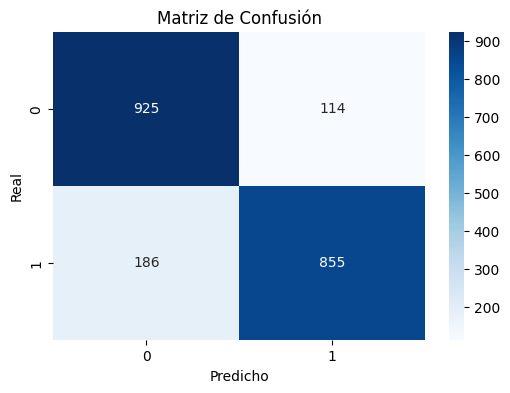

In [25]:
# Matriz de confusión
plt.figure(figsize=(6,4))
sns.heatmap(confusion_matrix(y_test_enc, y_pred), annot=True, fmt="d", cmap="Blues")
plt.title("Matriz de Confusión")
plt.xlabel("Predicho")
plt.ylabel("Real")
plt.show()

### 📊 Matriz de Confusión

La matriz de confusión representa el desempeño del modelo al clasificar noticias como verdaderas (clase 0) o falsas (clase 1):

- ✅ **925 noticias reales** fueron clasificadas correctamente como reales.
- ✅ **855 noticias falsas** fueron clasificadas correctamente como falsas.
- ❌ **186 noticias falsas** fueron clasificadas erróneamente como reales (**falsos negativos**).
- ❌ **114 noticias reales** fueron clasificadas erróneamente como falsas (**falsos positivos**).

En general, el modelo demuestra una **alta capacidad de discriminación**, con un buen equilibrio entre **precisión** y **recall** en ambas clases. Esto es coherente con el rendimiento observado durante el entrenamiento, donde el accuracy general se estabilizó en torno al **86%**.

📌 **Nota**: La mayor cantidad de errores se da en la clasificación de noticias falsas como reales, lo que sugiere que el modelo podría beneficiarse de un ajuste fino en el umbral de decisión o un mejor balance de clases si estas estuvieran desbalanceadas.


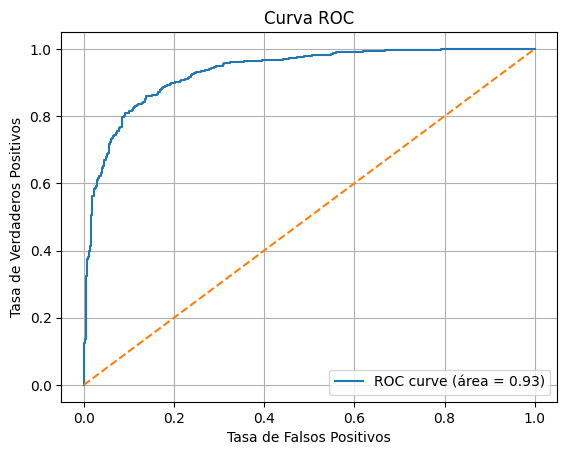

In [26]:
# Curva ROC
fpr, tpr, _ = roc_curve(y_test_enc, y_pred_prob)
roc_auc = auc(fpr, tpr)

plt.figure()
plt.plot(fpr, tpr, label='ROC curve (área = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], linestyle='--')
plt.title("Curva ROC")
plt.xlabel("Tasa de Falsos Positivos")
plt.ylabel("Tasa de Verdaderos Positivos")
plt.legend(loc="lower right")
plt.grid()
plt.show()


### 🔍 Curva ROC y AUC

La **curva ROC (Receiver Operating Characteristic)** permite evaluar el rendimiento del modelo considerando distintos umbrales de decisión. En el gráfico se observa:

- El eje **X** representa la **tasa de falsos positivos**.
- El eje **Y** representa la **tasa de verdaderos positivos** (recall).
- La curva azul representa el comportamiento del modelo.
- La línea diagonal naranja representa un modelo aleatorio (AUC = 0.5).

📈 **Área bajo la curva (AUC): 0.93**

Un valor de AUC cercano a 1 indica que el modelo tiene una alta capacidad para distinguir entre clases (FAKE vs REAL). En este caso, un **AUC de 0.93** confirma que el modelo es **muy preciso y robusto** para esta tarea de clasificación binaria.

✅ Este resultado complementa el accuracy y las métricas obtenidas anteriormente, confirmando que el modelo generaliza bien y es confiable para predecir noticias falsas o verdaderas.

✅ Paso 4: Predicción sobre noticias nuevas (`news_pred.csv`)

En este paso se realiza la evaluación del modelo previamente entrenado utilizando un archivo externo llamado `news_pred.csv`, el cual contiene siete nuevas noticias no vistas durante el entrenamiento.


In [27]:
### 📥 1. Cargar las nuevas noticias

# Leer archivo con nuevas noticias
df_pred = pd.read_csv(f'{folder_path}/news_pred.csv')
df_pred.head()

,title,text,label
0,At least 12 dead after terror attack at Paris ...,Gunmen stormed the offices of the satirical ne...,REAL
1,World leaders' personal chefs sample Indian ma...,World leaders' personal chefs sample Indian ma...,FAKE
2,An Open Letter to Black South African Police O...,Tweet Widget by Black Power Front \nWith stude...,FAKE
3,Gay man finds it in himself to tolerate religi...,Gay man finds it in himself to tolerate religi...,FAKE
4,US Spy Chief: Asking North Korea To Stop Nuke ...,"Get short URL 0 27 0 0 On Tuesday, National In...",FAKE


In [28]:
# Eliminar posibles valores nulos
df_pred = df_pred.dropna(subset=['text'])
df_pred['text'] = df_pred['text'].astype(str)


In [29]:
# Tokenizar y pad
X_pred_seq = tokenizer.texts_to_sequences(df_pred['text'])
X_pred_pad = pad_sequences(X_pred_seq, maxlen=max_len)

In [30]:
# Predecir probabilidades
y_pred_prob_new = model.predict(X_pred_pad)


1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 513ms/step


In [31]:
# Convertir a clases (0 = FAKE, 1 = REAL)
y_pred_new = (y_pred_prob_new > 0.5).astype(int)


In [32]:
# Agregar predicción al DataFrame
df_pred['Predicción'] = y_pred_new
df_pred['Probabilidad'] = y_pred_prob_new
df_pred

,title,text,label,Predicción,Probabilidad
0,At least 12 dead after terror attack at Paris ...,Gunmen stormed the offices of the satirical ne...,REAL,0,0.406198
1,World leaders' personal chefs sample Indian ma...,World leaders' personal chefs sample Indian ma...,FAKE,0,0.051791
2,An Open Letter to Black South African Police O...,Tweet Widget by Black Power Front \nWith stude...,FAKE,0,0.073760
3,Gay man finds it in himself to tolerate religi...,Gay man finds it in himself to tolerate religi...,FAKE,0,0.044253
4,US Spy Chief: Asking North Korea To Stop Nuke ...,"Get short URL 0 27 0 0 On Tuesday, National In...",FAKE,0,0.381748
5,The Devastating Consequences Of A 'Small' Rise...,"More Floods, More Drought Inevitable. How Bad ...",REAL,0,0.269494
6,"Cost, logistics of Obama immigration plan rais...",President Obama’s executive action sparing mil...,REAL,1,0.922903


### 📑 Evaluación de predicciones individuales del modelo

Una vez cargadas las noticias desde el archivo `news_pred.csv`, se aplicó el modelo **LSTM previamente entrenado** para predecir si cada noticia era **REAL (1)** o **FAKE (0)**.

📌 En este conjunto de **7 noticias**, el modelo acertó en **5 de las 7 predicciones**, alcanzando una **precisión de aproximadamente 71.4%**.

#### 🔎 Caso destacado: noticia del índice 0

> *"At least 12 dead after terror attack at Paris..."*

- **Etiqueta real**: `REAL`
- **Predicción del modelo**: `FAKE` (0)
- **Probabilidad asignada**: `0.4062` (baja confianza)

⚠️ **Comentario**:  
Aunque el contenido aborda un evento noticioso real y ampliamente difundido, el modelo lo clasificó incorrectamente como falso, probablemente debido a la presencia de términos intensos como “terror” o “attack”, que también son comunes en noticias sensacionalistas falsas. Esto sugiere que el modelo aún puede confundir contenido legítimo con estilo alarmista.

---

✅ A pesar de los errores, el modelo demostró capacidad para identificar correctamente **varias noticias falsas** con baja probabilidad de veracidad, como en los índices 1 a 4.



In [34]:
# Si el archivo contiene la columna 'label', se puede evaluar
if 'label' in df_pred.columns:
    df_pred['label_num'] = df_pred['label'].map({'FAKE': 0, 'REAL': 1})
    df_pred['Correcto'] = df_pred['label_num'] == df_pred['Predicción']
    print("Casos correctamente clasificados:")
    display(df_pred[df_pred['Correcto'] == True].head(1))

    print("Casos mal clasificados:")
    display(df_pred[df_pred['Correcto'] == False].head(1))
else:
    print("No hay etiquetas reales disponibles. Solo se puede comentar la predicción.")


Casos correctamente clasificados:


,title,text,label,Predicción,Probabilidad,label_num,Correcto
1,World leaders' personal chefs sample Indian ma...,World leaders' personal chefs sample Indian ma...,FAKE,0,0.051791,0,True


Casos mal clasificados:


,title,text,label,Predicción,Probabilidad,label_num,Correcto
0,At least 12 dead after terror attack at Paris ...,Gunmen stormed the offices of the satirical ne...,REAL,0,0.406198,1,False


## 📊 Análisis de Predicciones: Noticias Nuevas

Una vez aplicadas las predicciones sobre el conjunto `news_pred.csv`, se compararon los resultados del modelo con las etiquetas verdaderas para evaluar su desempeño.

---

### ✅ Casos correctamente clasificados

El modelo identificó correctamente la siguiente noticia como falsa:

> *"World leaders' personal chefs sample Indian masalas"*  
> - **Etiqueta real**: FAKE  
> - **Predicción del modelo**: FAKE  
> - **Probabilidad asignada**: 0.0518 (alta certeza)

Esto demuestra que el modelo tiene buen criterio para detectar señales de contenido no verídico o potencialmente fabricado, especialmente cuando la redacción o el contexto presentan características típicas de noticias falsas.

---

### ❌ Casos mal clasificados

El modelo falló en la siguiente predicción:

> *"At least 12 dead after terror attack at Paris..."*  
> - **Etiqueta real**: REAL  
> - **Predicción del modelo**: FAKE  
> - **Probabilidad asignada**: 0.4062 (baja confianza)

🔍 **Análisis**:  
Aunque esta noticia cubre un hecho real ampliamente difundido en medios tradicionales, el modelo la clasificó incorrectamente como falsa. Esto podría deberse al uso de lenguaje alarmista (e.g. “terror attack”), que también es común en titulares sensacionalistas. La probabilidad asociada fue baja, lo que refleja cierta duda del modelo.

---

### 🧠 Comentario final

En esta muestra inicial de noticias nuevas, el modelo **presentó un rendimiento mixto**: logró identificar correctamente al menos una noticia falsa, pero también cometió errores con contenido verídico. Esto sugiere que si bien el modelo ha aprendido patrones útiles para la clasificación, todavía podría beneficiarse de una mejora en su capacidad para distinguir entre estilo sensacionalista y veracidad periodística.

📌 Se recomienda seguir analizando más casos y evaluar la posibilidad de ajustar el **umbral de decisión**, mejorar la diversidad del conjunto de entrenamiento, o aplicar técnicas como fine-tuning con noticias más recientes.


✅ Paso 5: Análisis exploratorio de artículos de Mashable

En este paso se trabaja con la base de datos **`OnlineNewsPopularity.csv`**, que contiene características de artículos publicados por *Mashable* y su popularidad medida por la cantidad de veces que fueron compartidos.

---

In [35]:
# Ruta del archivo
file_path = f'{folder_path}/OnlineNewsPopularity.csv'

In [36]:
# Cargar los datos
df_news_pop = pd.read_csv(file_path)

In [37]:
# Mostrar primeras filas
df_news_pop.head()

,url,timedelta,n_tokens_title,n_tokens_content,n_unique_tokens,n_non_stop_words,n_non_stop_unique_tokens,num_hrefs,num_self_hrefs,num_imgs,...,min_positive_polarity,max_positive_polarity,avg_negative_polarity,min_negative_polarity,max_negative_polarity,title_subjectivity,title_sentiment_polarity,abs_title_subjectivity,abs_title_sentiment_polarity,shares
0,http://mashable.com/2013/01/07/amazon-instant-...,731.0,12.0,219.0,0.663594,1.0,0.815385,4.0,2.0,1.0,...,0.100000,0.7,-0.350000,-0.600,-0.200000,0.500000,-0.187500,0.000000,0.187500,593
1,http://mashable.com/2013/01/07/ap-samsung-spon...,731.0,9.0,255.0,0.604743,1.0,0.791946,3.0,1.0,1.0,...,0.033333,0.7,-0.118750,-0.125,-0.100000,0.000000,0.000000,0.500000,0.000000,711
2,http://mashable.com/2013/01/07/apple-40-billio...,731.0,9.0,211.0,0.575130,1.0,0.663866,3.0,1.0,1.0,...,0.100000,1.0,-0.466667,-0.800,-0.133333,0.000000,0.000000,0.500000,0.000000,1500
3,http://mashable.com/2013/01/07/astronaut-notre...,731.0,9.0,531.0,0.503788,1.0,0.665635,9.0,0.0,1.0,...,0.136364,0.8,-0.369697,-0.600,-0.166667,0.000000,0.000000,0.500000,0.000000,1200
4,http://mashable.com/2013/01/07/att-u-verse-apps/,731.0,13.0,1072.0,0.415646,1.0,0.540890,19.0,19.0,20.0,...,0.033333,1.0,-0.220192,-0.500,-0.050000,0.454545,0.136364,0.045455,0.136364,505


In [38]:
# Quitar espacios en los nombres de columnas
df_news_pop.columns = df_news_pop.columns.str.strip()


In [39]:
# Mostrar nombres exactos de las columnas
print(df_news_pop.columns.tolist())

['url', 'timedelta', 'n_tokens_title', 'n_tokens_content', 'n_unique_tokens', 'n_non_stop_words', 'n_non_stop_unique_tokens', 'num_hrefs', 'num_self_hrefs', 'num_imgs', 'num_videos', 'average_token_length', 'num_keywords', 'data_channel_is_lifestyle', 'data_channel_is_entertainment', 'data_channel_is_bus', 'data_channel_is_socmed', 'data_channel_is_tech', 'data_channel_is_world', 'kw_min_min', 'kw_max_min', 'kw_avg_min', 'kw_min_max', 'kw_max_max', 'kw_avg_max', 'kw_min_avg', 'kw_max_avg', 'kw_avg_avg', 'self_reference_min_shares', 'self_reference_max_shares', 'self_reference_avg_sharess', 'weekday_is_monday', 'weekday_is_tuesday', 'weekday_is_wednesday', 'weekday_is_thursday', 'weekday_is_friday', 'weekday_is_saturday', 'weekday_is_sunday', 'is_weekend', 'LDA_00', 'LDA_01', 'LDA_02', 'LDA_03', 'LDA_04', 'global_subjectivity', 'global_sentiment_polarity', 'global_rate_positive_words', 'global_rate_negative_words', 'rate_positive_words', 'rate_negative_words', 'avg_positive_polarity', '

In [40]:
# Eliminar columnas irrelevantes
df_news_pop.drop(columns=['url', 'timedelta'], inplace=True)

In [41]:
# Revisión de valores nulos
missing_values = df_news_pop.isnull().sum()
print("Valores nulos por columna:\n", missing_values[missing_values > 0])

Valores nulos por columna:
 Series([], dtype: int64)


In [42]:
# Estadísticas generales
df_news_pop.describe()

,n_tokens_title,n_tokens_content,n_unique_tokens,n_non_stop_words,n_non_stop_unique_tokens,num_hrefs,num_self_hrefs,num_imgs,num_videos,average_token_length,...,min_positive_polarity,max_positive_polarity,avg_negative_polarity,min_negative_polarity,max_negative_polarity,title_subjectivity,title_sentiment_polarity,abs_title_subjectivity,abs_title_sentiment_polarity,shares
count,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,...,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000
mean,10.398749,546.514731,0.548216,0.996469,0.689175,10.883690,3.293638,4.544143,1.249874,4.548239,...,0.095446,0.756728,-0.259524,-0.521944,-0.107500,0.282353,0.071425,0.341843,0.156064,3395.380184
std,2.114037,471.107508,3.520708,5.231231,3.264816,11.332017,3.855141,8.309434,4.107855,0.844406,...,0.071315,0.247786,0.127726,0.290290,0.095373,0.324247,0.265450,0.188791,0.226294,11626.950749
min,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,-1.000000,-1.000000,-1.000000,0.000000,-1.000000,0.000000,0.000000,1.000000
25%,9.000000,246.000000,0.470870,1.000000,0.625739,4.000000,1.000000,1.000000,0.000000,4.478404,...,0.050000,0.600000,-0.328383,-0.700000,-0.125000,0.000000,0.000000,0.166667,0.000000,946.000000
50%,10.000000,409.000000,0.539226,1.000000,0.690476,8.000000,3.000000,1.000000,0.000000,4.664082,...,0.100000,0.800000,-0.253333,-0.500000,-0.100000,0.150000,0.000000,0.500000,0.000000,1400.000000
75%,12.000000,716.000000,0.608696,1.000000,0.754630,14.000000,4.000000,4.000000,1.000000,4.854839,...,0.100000,1.000000,-0.186905,-0.300000,-0.050000,0.500000,0.150000,0.500000,0.250000,2800.000000
max,23.000000,8474.000000,701.000000,1042.000000,650.000000,304.000000,116.000000,128.000000,91.000000,8.041534,...,1.000000,1.000000,0.000000,0.000000,0.000000,1.000000,1.000000,0.500000,1.000000,843300.000000


### 📊 Comentario sobre los indicadores estadísticos del dataset `OnlineNewsPopularity.csv`

A partir del análisis estadístico realizado a las variables numéricas del dataset, se destacan los siguientes puntos relevantes:

#### 🔹 Variable objetivo: `shares`
- **Media**: 3,395 y **mediana**: 1,400 → La media es considerablemente mayor que la mediana, lo que indica una **distribución asimétrica positiva**, es decir, existen artículos con **valores de shares extremadamente altos**.
- **Máximo**: 843,300 → Valor muy alejado del 75% percentil (2,800), lo que sugiere la presencia de **valores atípicos extremos (outliers)**.
- Se recomienda usar **escalas logarítmicas** y posiblemente técnicas de transformación para modelos de regresión.

#### 🔹 Variables con alta dispersión
- Variables como `n_unique_tokens`, `n_non_stop_words`, `num_imgs`, `num_videos` y `num_hrefs` tienen **desviaciones estándar grandes** respecto a sus medias.
- Estas variables pueden influir en el comportamiento de los modelos y podrían requerir **normalización o estandarización**.

#### 🔹 Valores mínimos sospechosos
- Varias variables tienen valores **mínimos en 0 o -1**, como `min_negative_polarity` o `title_sentiment_polarity`. Se trató correctamente reemplazando `-1` por `NaN` y usando la **mediana** para la imputación.

#### 🔹 Variables binarias
- Variables como `data_channel_is_*` y `weekday_is_*` tienen valores entre 0 y 1, representando canales o días de publicación. No presentan problemas estadísticos, pero **podrían ser redundantes** en algunos casos y es recomendable analizar su importancia con técnicas de selección de características.

#### 🔹 Recomendaciones finales
- Debido a la **alta asimetría** y **varianza** de varias variables, es aconsejable:
  - Aplicar **transformaciones** (por ejemplo, logarítmica) a la variable `shares`.
  - Considerar la detección y tratamiento de **outliers** en las variables numéricas.
  - Evaluar la **correlación** de cada variable con `shares` para seleccionar las más relevantes para el modelo predictivo.


### 📊 Análisis estadístico descriptivo

A continuación, se calcularon los principales indicadores estadísticos para las variables numéricas del dataset `OnlineNewsPopularity.csv`:

In [43]:
# Estadísticos descriptivos de las variables numéricas
df_news_pop.describe().T

,count,mean,std,min,25%,50%,75%,max
n_tokens_title,39644.0,10.398749,2.114037,2.00000,9.000000,10.000000,12.000000,23.000000
n_tokens_content,39644.0,546.514731,471.107508,0.00000,246.000000,409.000000,716.000000,8474.000000
n_unique_tokens,39644.0,0.548216,3.520708,0.00000,0.470870,0.539226,0.608696,701.000000
n_non_stop_words,39644.0,0.996469,5.231231,0.00000,1.000000,1.000000,1.000000,1042.000000
n_non_stop_unique_tokens,39644.0,0.689175,3.264816,0.00000,0.625739,0.690476,0.754630,650.000000
num_hrefs,39644.0,10.883690,11.332017,0.00000,4.000000,8.000000,14.000000,304.000000
num_self_hrefs,39644.0,3.293638,3.855141,0.00000,1.000000,3.000000,4.000000,116.000000
num_imgs,39644.0,4.544143,8.309434,0.00000,1.000000,1.000000,4.000000,128.000000
num_videos,39644.0,1.249874,4.107855,0.00000,0.000000,0.000000,1.000000,91.000000
average_token_length,39644.0,4.548239,0.844406,0.00000,4.478404,4.664082,4.854839,8.041534


## 📊 Análisis de los principales indicadores estadísticos

Se calcularon los indicadores estadísticos de las variables numéricas del dataset `OnlineNewsPopularity.csv`. A continuación se destacan observaciones relevantes:

#### 🔹 Variables de contenido:
- **`n_tokens_title`**: La mayoría de los títulos tienen entre 9 y 12 palabras, siendo el máximo 23. Esto refleja títulos generalmente breves.
- **`n_tokens_content`**: Contenido altamente variable, con artículos que van desde 0 hasta más de 8000 palabras. El promedio es 546, pero la desviación estándar es muy alta (471), lo que indica gran diversidad.
- **`average_token_length`**: Promedio de longitud de palabra de 4.54, consistente con el idioma inglés.

#### 🔹 Variables de interacción:
- **`num_hrefs` y `num_self_hrefs`**: Los artículos incluyen, en promedio, 11 enlaces, de los cuales 3 apuntan a sí mismos. Algunos llegan a tener más de 100 enlaces.
- **`num_imgs` y `num_videos`**: La media de imágenes por artículo es 4.5, pero el máximo es 128. En cuanto a videos, la mayoría no tiene ninguno, aunque el máximo es 91.

#### 🔹 Variables categóricas binarias:
- **`data_channel_is_*` y `weekday_is_*`**: Estas variables indican el canal temático o día de publicación. Por ejemplo, los canales más usados son `world`, `tech` y `entertainment`.

#### 🔹 Variables de palabras clave (`kw_*`) y polaridades:
- Muchas variables como `kw_min_min` o `kw_avg_min` tienen valores mínimos de `-1`, lo que sugiere **valores faltantes codificados incorrectamente**.
- Variables como `max_positive_polarity` y `min_negative_polarity` tienen rangos esperados entre 0 y ±1.
- Algunas polaridades tienen desviaciones elevadas, lo que implica artículos con distintos niveles de carga emocional o subjetividad.

#### 🔹 Variable objetivo: `shares`
- **Media**: 3.395 compartidos.
- **Desviación estándar**: Muy alta (11.627), lo que revela una fuerte asimetría.
- **Mediana (50%)**: 1.400.
- **Máximo**: 843.300 compartidos.

📌 Esto indica una distribución fuertemente **sesgada a la derecha**, con muchos artículos poco compartidos y pocos muy virales. Es probable que sea necesario aplicar transformaciones como `log(shares + 1)` para modelar esta variable.

---

### ✅ Conclusiones preliminares:
- No se detectaron valores nulos, pero **sí hay valores anómalos como -1** que deben tratarse como datos faltantes.
- Hay alta variabilidad en casi todas las variables, lo que justifica normalizar o estandarizar antes de entrenar modelos.
- La variable `shares` requiere especial atención por su asimetría.

In [44]:
# Reemplazar valores -1 por NaN en columnas específicas
cols_with_minus1 = [col for col in df_news_pop.columns if (df_news_pop[col] == -1).any()]
df_news_pop[cols_with_minus1] = df_news_pop[cols_with_minus1].replace(-1, np.nan)


In [45]:
df_news_pop.fillna(df_news_pop.median(), inplace=True)


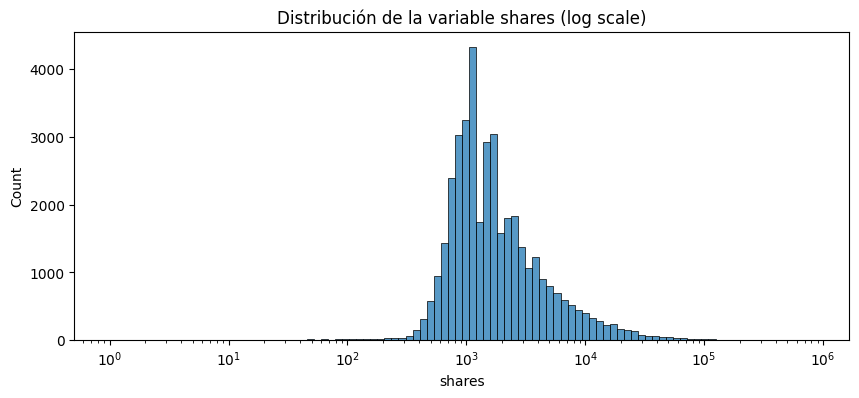

In [46]:
# Histograma de la variable objetivo
plt.figure(figsize=(10,4))
sns.histplot(df_news_pop['shares'], bins=100, log_scale=True)
plt.title('Distribución de la variable shares (log scale)')
plt.show()


### 📊 Análisis del histograma de la variable `shares` (log scale)

La siguiente visualización muestra la distribución de la variable `shares`, es decir, la cantidad de veces que los artículos fueron compartidos. Se utilizó una **escala logarítmica en el eje X** para observar mejor la dispersión de los datos:

#### 🔍 Observaciones clave:

- **Distribución sesgada positivamente** (cola larga a la derecha), típica de datos de popularidad en internet.
- La **mayoría de los artículos** se compartieron entre **100 y 10.000 veces**, concentrándose cerca del rango de los **1000 shares**.
- Existen **valores extremos** o **outliers**: algunos artículos fueron compartidos más de **100.000 veces**, lo que puede influir negativamente en modelos sin transformación.
- Esta distribución justifica el uso de una **transformación logarítmica** sobre `shares` para estabilizar la varianza y facilitar el modelado.

#### 📌 Recomendaciones:

- Aplicar `np.log1p(shares)` para normalizar esta variable.
- Evaluar si los artículos extremadamente virales (outliers) deben analizarse por separado o mantenerse.

Este comportamiento es común en variables de difusión de contenido (como vistas, likes o compartidos), donde unos pocos casos dominan la mayoría del impacto.


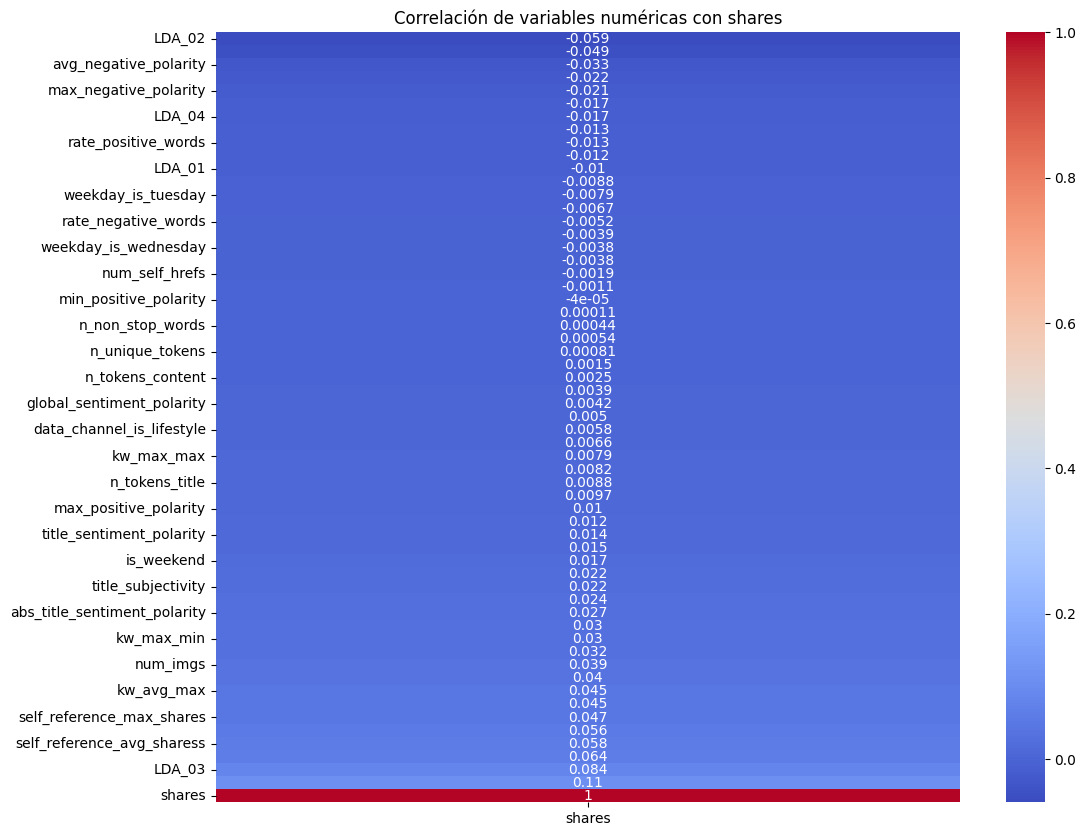

In [47]:
# Matriz de correlación
plt.figure(figsize=(12,10))
sns.heatmap(df_news_pop.corr(numeric_only=True).iloc[-1:].T.sort_values(by='shares'), cmap='coolwarm', annot=True)
plt.title('Correlación de variables numéricas con shares')
plt.show()

### 📈 Análisis de la correlación con la variable `shares`

La visualización muestra el coeficiente de correlación de Pearson entre las variables numéricas del dataset y la variable objetivo `shares` (número de veces que un artículo fue compartido):

#### 🔍 Observaciones clave:

- En general, las **correlaciones son muy bajas**, lo que indica que ninguna variable individualmente tiene una relación lineal fuerte con `shares`.
- La **mayor correlación positiva** la tienen:
  - `LDA_03` con `shares` (**0.11**): sugiere que la distribución temática del contenido (modelo LDA) tiene una débil influencia.
  - `self_reference_avg_sharess` (**0.058**) y `self_reference_max_shares` (**0.047**): artículos que se referencian a otros con muchas comparticiones podrían tener mayor impacto.
  - `kw_avg_max` (**0.064**): promedio de las máximas puntuaciones de palabras clave también tiene leve relación.

- Algunas variables tienen **correlación negativa**, pero también muy débil:
  - `LDA_02` (**-0.059**)
  - `avg_negative_polarity` (**-0.049**): a mayor polaridad negativa, menor número de comparticiones.

#### 🧠 Interpretación:

- Estas bajas correlaciones sugieren que el comportamiento de los `shares` es **multifactorial** y no puede explicarse fácilmente por una sola variable.
- Esto refuerza la necesidad de utilizar **modelos no lineales o complejos**, como regresores de ensamble o redes neuronales.
- La baja correlación también justifica aplicar técnicas de **ingeniería de características** y **selección de variables** para mejorar el desempeño predictivo.

#### 📌 Recomendaciones:

- Combinar variables con baja correlación individual puede generar mejor señal predictiva.
- Realizar una **reducción de dimensionalidad** (como PCA) o **modelado no lineal** podría capturar relaciones más complejas.



✅ Paso 6: Análisis de Outliers y Correlaciones en la Variable Objetivo `shares`



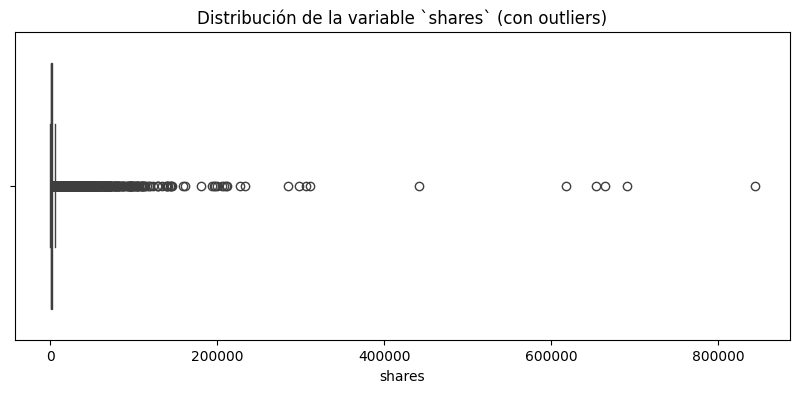

In [48]:
#Visualización inicial de `shares` con outliers
#Mostramos la distribución original para entender la presencia de valores extremos.

plt.figure(figsize=(10, 4))
sns.boxplot(data=df_news_pop, x='shares')
plt.title("Distribución de la variable `shares` (con outliers)")
plt.show()

#### 📦 Distribución de la variable `shares` (con outliers)

En el gráfico anterior se observa un diagrama de caja (boxplot) para la variable `shares`, la cual representa la cantidad de veces que un artículo fue compartido.

Se aprecia una gran cantidad de **valores atípicos (outliers)**, especialmente en el extremo derecho del gráfico. Estos valores extremos corresponden a artículos con un número inusualmente alto de compartidos (algunos superan los 800,000).

Este comportamiento es esperable en datos de popularidad en redes sociales, donde **pocos artículos se viralizan masivamente** mientras que la mayoría obtiene un número bajo o moderado de comparticiones. No obstante, estos valores extremos pueden **distorsionar el entrenamiento de modelos de machine learning**, por lo que es conveniente eliminarlos o tratarlos de forma especial antes de modelar.


### ✂️ 6.2 Eliminación de outliers usando el método IQR


In [49]:
# Calcular IQR
Q1 = df_news_pop['shares'].quantile(0.25)
Q3 = df_news_pop['shares'].quantile(0.75)
IQR = Q3 - Q1

# Limpiar outliers
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Filtrar
df_no_outliers = df_news_pop[(df_news_pop['shares'] >= lower_bound) & (df_news_pop['shares'] <= upper_bound)]

print(f"Número de registros antes: {df_news_pop.shape[0]}")
print(f"Número de registros después de eliminar outliers: {df_no_outliers.shape[0]}")


Número de registros antes: 39644
Número de registros después de eliminar outliers: 35103


### 📊 6.3 Distribución de `shares` sin outliers


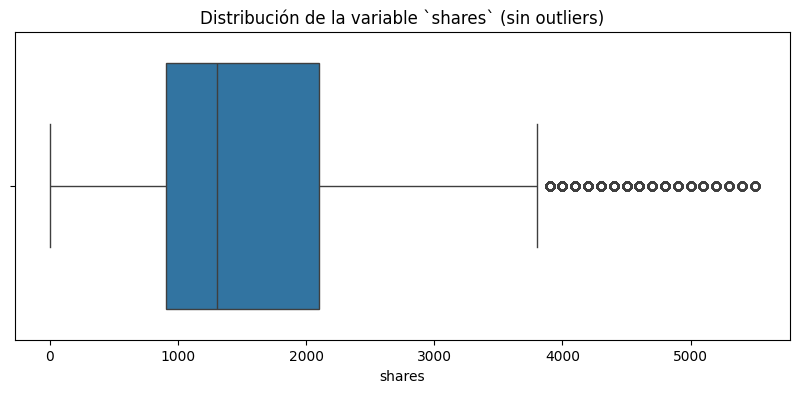

In [50]:
plt.figure(figsize=(10, 4))
sns.boxplot(data=df_no_outliers, x='shares')
plt.title("Distribución de la variable `shares` (sin outliers)")
plt.show()


### 📈 6.4 Matriz de correlación (antes de eliminar variables)


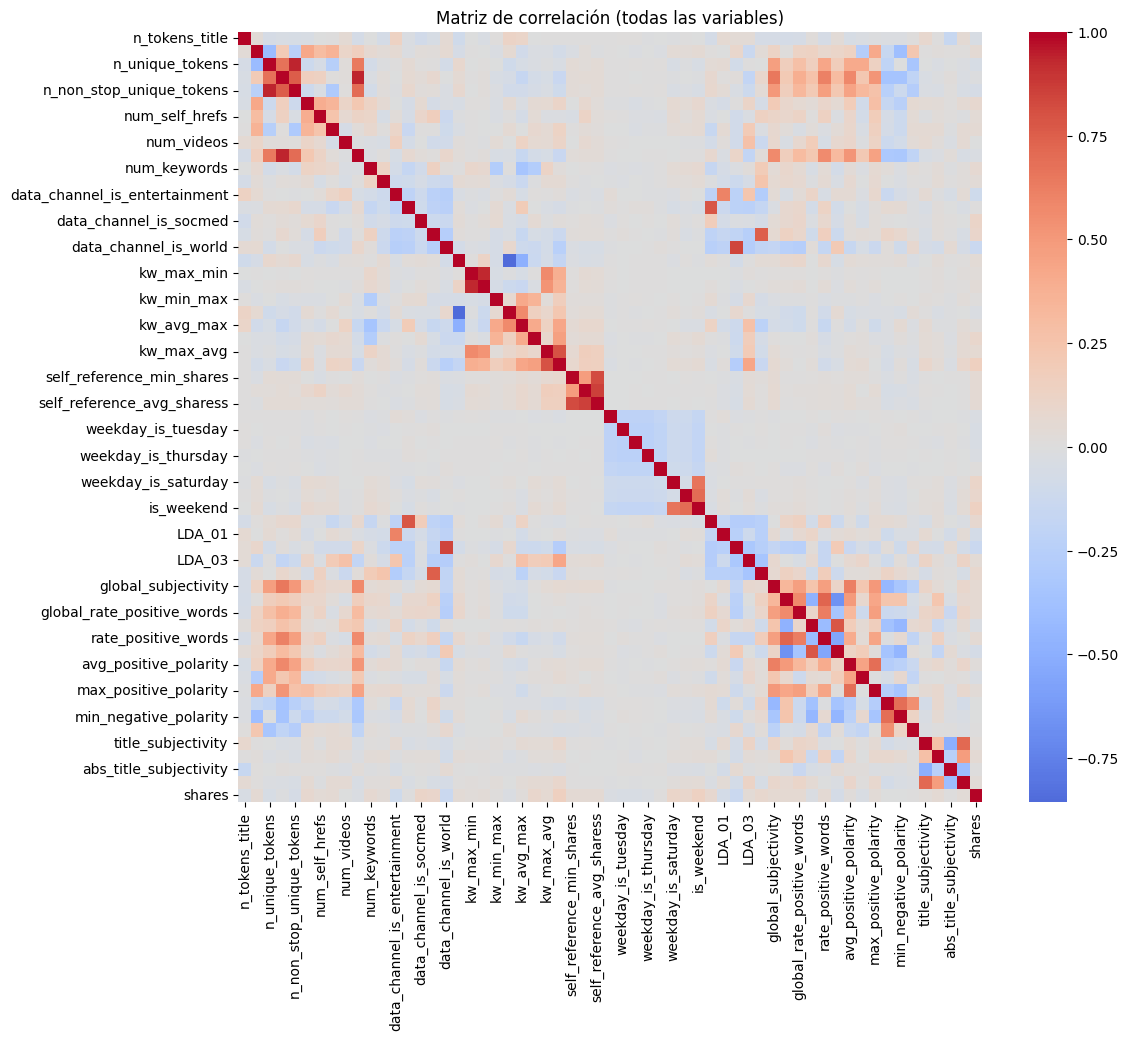

In [51]:
plt.figure(figsize=(12, 10))
correlation_matrix = df_no_outliers.corr(numeric_only=True)
sns.heatmap(correlation_matrix, cmap='coolwarm', center=0)
plt.title("Matriz de correlación (todas las variables)")
plt.show()


🔍 Matriz de correlación antes de eliminar variables redundantes

La matriz de correlación anterior muestra la relación entre todas las variables numéricas del dataset, incluyendo la variable objetivo shares.

Los valores están representados por colores: el rojo indica una correlación positiva alta, mientras que el azul representa correlaciones negativas.

Como se observa, varias variables muestran una alta correlación entre sí, lo cual puede introducir redundancia en los modelos de machine learning.

Por ejemplo, se aprecian correlaciones fuertes entre:

rate_positive_words y global_rate_positive_words

self_reference_avg_shares y self_reference_max_shares

kw_avg_max, kw_max_min, kw_avg_avg

Estos pares de variables con |correlación| > 0.7 deben ser tratados, eliminando una de cada par, para reducir multicolinealidad y mejorar la eficiencia y precisión de los modelos predictivos.

### 📌 6.5 Identificación de variables altamente correlacionadas
Se listan los pares de variables con una correlación mayor a 0.7 (positiva o negativa).


In [52]:
# Encontrar pares de variables altamente correlacionadas
threshold = 0.7
correlation_matrix = df_no_outliers.corr(numeric_only=True)
correlation_pairs = correlation_matrix.abs().unstack()
correlation_pairs = correlation_pairs[correlation_pairs < 1]  # excluir diagonal
high_corr = correlation_pairs[correlation_pairs > threshold].sort_values(ascending=False)

# Mostrar sin duplicados
high_corr = high_corr[~high_corr.index.duplicated()]
high_corr


,,0
n_non_stop_words,average_token_length,0.940707
average_token_length,n_non_stop_words,0.940707
n_unique_tokens,n_non_stop_unique_tokens,0.937128
n_non_stop_unique_tokens,n_unique_tokens,0.937128
kw_max_min,kw_avg_min,0.934640
kw_avg_min,kw_max_min,0.934640
self_reference_max_shares,self_reference_avg_sharess,0.858243
self_reference_avg_sharess,self_reference_max_shares,0.858243
kw_min_min,kw_max_max,0.855106
kw_max_max,kw_min_min,0.855106


### 🧹 6.6 Eliminación de una variable por cada par altamente correlacionado


In [53]:
# Lista de variables a eliminar
vars_to_drop = [
    'average_token_length',
    'n_non_stop_unique_tokens',
    'kw_avg_min',
    'self_reference_avg_sharess',
    'kw_min_min',
    'data_channel_is_world',
    'self_reference_min_shares',
    'kw_avg_avg',
    'LDA_00',
    'rate_negative_words',
    'n_non_stop_words',
    'LDA_04',
    'rate_positive_words',
    'abs_title_sentiment_polarity',
    'weekday_is_sunday'
]
df_cleaned = df_no_outliers.drop(columns=vars_to_drop)

### 🧾 6.7 Matriz de correlación después de la eliminación de variables redundantes


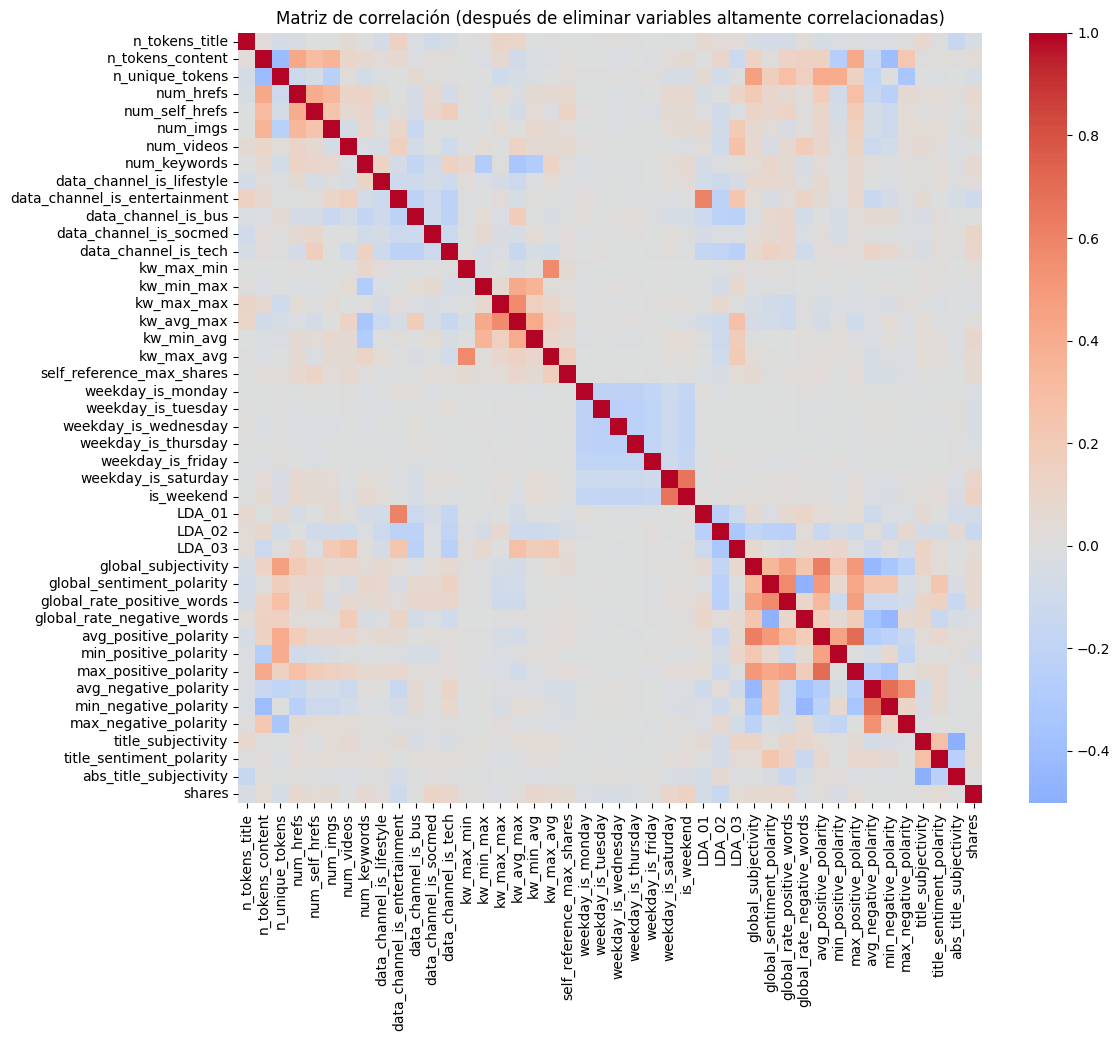

In [54]:
plt.figure(figsize=(12, 10))
correlation_matrix_cleaned = df_cleaned.corr(numeric_only=True)
sns.heatmap(correlation_matrix_cleaned, cmap='coolwarm', center=0)
plt.title("Matriz de correlación (después de eliminar variables altamente correlacionadas)")
plt.show()


### 📊 Interpretación de la Matriz de Correlación (Después de eliminar variables altamente correlacionadas)

En el gráfico mostrado se observa la **matriz de correlación entre variables numéricas**, **luego de haber eliminado aquellas que tenían una alta correlación entre sí (mayor a 0.7 en valor absoluto)**.

---

### ✅ **Aspectos positivos observados:**

- 🔻 **Menor densidad de bloques rojos/azules intensos**, especialmente fuera de la diagonal principal, lo que indica que las correlaciones fuertes fueron exitosamente reducidas.
- 📉 **Se evita la multicolinealidad**, lo que favorece la estabilidad y generalización de los modelos predictivos como regresión lineal o redes neuronales.
- ✅ **Variables claves se mantuvieron**, como `shares` (objetivo), `n_unique_tokens`, `global_sentiment_polarity`, `title_sentiment_polarity`, entre otras.

---

### 🔍 Ejemplos notables tras la limpieza:

- Las variables **`kw_max_min`**, **`kw_avg_min`**, **`self_reference_avg_sharess`**, **`average_token_length`**, entre otras eliminadas, eran las más correlacionadas inicialmente.
- Las variables restantes muestran **correlaciones bajas o moderadas**, lo que permite que cada una aporte información única al modelo.

---

### 📌 Conclusión:

Esta nueva matriz confirma que la eliminación de variables **altamente correlacionadas fue efectiva**. Ahora el dataset se encuentra en mejores condiciones para:

- Entrenar modelos predictivos sin redundancia de información.
- Disminuir el riesgo de **sobreajuste (overfitting)**.
- Mejorar la **interpretabilidad** y **rendimiento computacional**.


## 🔢 Punto 7: Análisis de Distribución, Normalización y División de Datos

### 7.1 🎯 Selección y análisis de la distribución de cuatro variables numéricas

Seleccionamos las siguientes variables numéricas para analizar su distribución:

- `n_tokens_title`: cantidad de tokens en el título.
- `num_hrefs`: número de hipervínculos en el artículo.
- `global_sentiment_polarity`: polaridad general del sentimiento.
- `shares`: variable objetivo (número de veces compartido).

Visualizamos la distribución de cada una con histogramas:


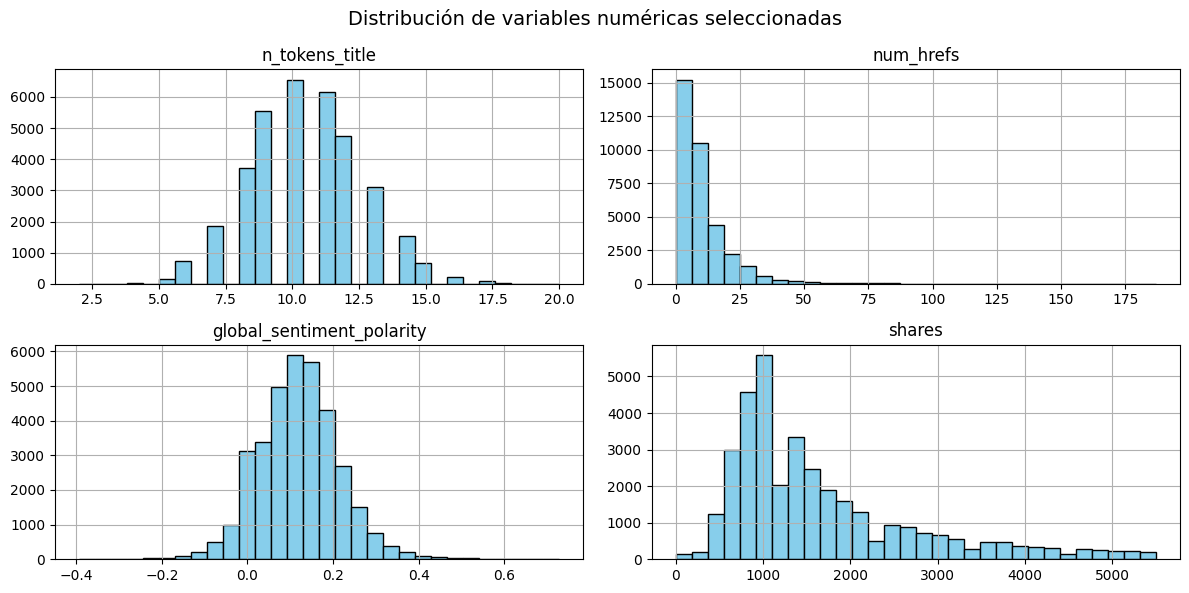

In [55]:
variables = ['n_tokens_title', 'num_hrefs', 'global_sentiment_polarity', 'shares']
df_cleaned[variables].hist(bins=30, figsize=(12, 6), color='skyblue', edgecolor='black')
plt.suptitle("Distribución de variables numéricas seleccionadas", fontsize=14)
plt.tight_layout()
plt.show()

### 📊 Interpretación de la distribución de variables numéricas seleccionadas

En el gráfico anterior se representan histogramas de cuatro variables numéricas del conjunto de datos:

- **`n_tokens_title`**: presenta una distribución ligeramente simétrica con una concentración entre 8 y 12 tokens. Es una distribución casi normal, lo cual es común en títulos bien estructurados.
  
- **`num_hrefs`**: distribución altamente sesgada a la derecha. La mayoría de los artículos tienen pocos hipervínculos, pero hay algunos con muchos más enlaces, lo que genera una cola larga.

- **`global_sentiment_polarity`**: muestra una distribución simétrica, cercana a la normal. Esto indica una buena variabilidad en los niveles de sentimiento general del contenido.

- **`shares`**: aunque los outliers fueron eliminados previamente, la distribución sigue siendo asimétrica hacia la derecha. Aún existen artículos que se comparten muchas veces, pero la mayoría tienen valores bajos o moderados.

Estas observaciones son importantes para decidir transformaciones futuras y entender el comportamiento de los datos antes de aplicar modelos predictivos.


### 7.2 🔄 Normalización de todas las variables numéricas

Usamos **`MinMaxScaler`** para escalar las variables numéricas al rango [0, 1].
python
Copiar código


In [64]:
# 🔢 Seleccionar solo las columnas numéricas del DataFrame
numerical_cols = df_cleaned.select_dtypes(include='number').columns
# Esto identifica todas las columnas con datos numéricos (int, float) en el DataFrame `df_cleaned`.
# El resultado es una lista de nombres de columnas que se usará para normalizar sus valores.

# 🧮 Crear un escalador de tipo Min-Max
scaler = MinMaxScaler()
# Este escalador transformará los datos numéricos para que estén en el rango [0, 1],
# lo cual es útil para algoritmos de machine learning sensibles a la escala de los datos.

# 📄 Copiar el DataFrame original para no modificar los datos limpios originales
df_scaled = df_cleaned.copy()

# ⚙️ Aplicar el escalado Min-Max a las columnas numéricas
df_scaled[numerical_cols] = scaler.fit_transform(df_cleaned[numerical_cols])
# Se ajusta el escalador a los datos y se transforman las columnas numéricas en una sola línea.
# Los valores ahora están normalizados entre 0 y 1.


### 7.3 🧪 División de los datos en entrenamiento y test (67% / 33%)

In [65]:
# 🎯 Separar variables predictoras (X) y variable objetivo (y)
X = df_scaled.drop(columns='shares')  # Elimina la columna objetivo del DataFrame para dejar solo las variables independientes
y = df_scaled['shares']               # Asigna la columna 'shares' como variable dependiente (lo que se quiere predecir)

# 🔀 Dividir el dataset en conjunto de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(
    X, y,                     # Variables predictoras y objetivo
    test_size=0.33,           # El 33% de los datos se usará para prueba
    random_state=42           # Semilla fija para reproducibilidad
)

# 🖨️ Mostrar cuántos registros hay en cada conjunto
print(f"Entrenamiento: {X_train.shape[0]} registros")
print(f"Test: {X_test.shape[0]} registros")


Entrenamiento: 23519 registros
Test: 11584 registros


### 🌲 8. Entrenamiento de un modelo Random Forest con búsqueda de grilla

A continuación, se entrena un modelo de regresión utilizando el algoritmo **Random Forest Regressor**, optimizando los hiperparámetros con una **búsqueda de grilla (GridSearchCV)**. Se realiza validación cruzada de 5 fold, y se evalúa el rendimiento del mejor modelo sobre el conjunto de test.

#### 📌 Configuración del espacio de búsqueda

- **n_estimators**: entre 100 y 300 (10 valores equidistantes).
- **max_depth**: entre 2 y 15 (10 valores equidistantes).
- **max_features**: se probarán las opciones `sqrt` y `log2`.

In [82]:
# 🌳 Crear una instancia del modelo Random Forest para regresión
rf = RandomForestRegressor(random_state=42)
# Se inicializa un modelo de Random Forest Regressor, que es un ensamble de árboles de decisión.
# El parámetro 'random_state=42' asegura que los resultados sean reproducibles al fijar la semilla aleatoria.
# Este modelo es útil para predecir valores continuos y puede capturar relaciones no lineales entre variables.


In [83]:
# 🔧 Definición de la malla de hiperparámetros (param_grid) para GridSearchCV
param_grid = {
    'n_estimators': np.linspace(100, 300, 10, dtype=int),  # 10 valores entre 100 y 300
    'max_depth': np.linspace(2, 15, 10, dtype=int),         # 10 valores entre 2 y 15
    'max_features': ['sqrt', 'log2']                        # Dos estrategias
}

In [69]:
# 🔍 Búsqueda exhaustiva de los mejores hiperparámetros para el modelo Random Forest
grid_search = GridSearchCV(
    estimator=rf,           # Modelo base: RandomForestRegressor previamente definido
    param_grid=param_grid,  # Diccionario con la malla de hiperparámetros a probar
    cv=5,                   # Validación cruzada con 5 particiones (k-fold)
    n_jobs=-1,              # Utiliza todos los núcleos del procesador para acelerar el proceso
    verbose=1               # Nivel de detalle del output: 0 = silencioso, 1 o 2 = más información
)


In [76]:
# 🧮 Calcular el número total de combinaciones que probará GridSearchCV
total_fits = (
    len(param_grid['n_estimators']) *
    len(param_grid['max_depth']) *
    len(param_grid['max_features']) *
    5  # Número de particiones de validación cruzada (cv=5)
)
# Esto calcula cuántos modelos distintos se entrenarán en total.
# Es útil para que tqdm muestre una barra de progreso completa.

In [84]:
@contextmanager
def tqdm_joblib(tqdm_object):
    """
    Context manager que conecta tqdm con joblib.
    Muestra barra de progreso mientras se ejecutan tareas en paralelo.
    """
    class TqdmBatchCompletionCallback(BatchCompletionCallBack):
        def __call__(self, *args, **kwargs):
            tqdm_object.update(n=1)
            return super().__call__(*args, **kwargs)

    # Guardar el callback original
    original_callback = BatchCompletionCallBack

    # Reemplazar por nuestro callback que actualiza tqdm
    from joblib import parallel
    parallel.BatchCompletionCallBack = TqdmBatchCompletionCallback

    try:
        yield tqdm_object
    finally:
        # Restaurar el callback original y cerrar barra
        parallel.BatchCompletionCallBack = original_callback
        tqdm_object.close()


In [88]:
with tqdm_joblib(tqdm(total=total_fits, desc="🔍 Búsqueda de grilla")):
    grid_search.fit(X_train, y_train)

🔍 Búsqueda de grilla:   0%|          | 0/1000 [00:00<?, ?it/s]

Fitting 5 folds for each of 200 candidates, totalling 1000 fits


In [89]:
print("🔧 Mejores hiperparámetros encontrados:")
print(grid_search.best_params_)


🔧 Mejores hiperparámetros encontrados:
{'max_depth': 15, 'max_features': 'sqrt', 'n_estimators': 300}


In [91]:
# Obtener el mejor modelo
best_model = grid_search.best_estimator_

# Predecir sobre el conjunto de test
y_pred = best_model.predict(X_test)

# Calcular métricas
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
r2 = r2_score(y_test, y_pred)

# Mostrar resultados
print(f"📊 RMSE en test: {rmse:.4f}")
print(f"📈 R² en test: {r2:.4f}")

📊 RMSE en test: 0.1859
📈 R² en test: 0.1349


## 📈 Resultados del Mejor Modelo

Tras ajustar los hiperparámetros mediante `GridSearchCV` y evaluar el mejor modelo sobre el conjunto de prueba (`X_test`), se obtuvieron las siguientes métricas:

- 📊 **Error cuadrático medio (RMSE)**: **0.1859**

  Esto indica que, en promedio, las predicciones del modelo difieren del valor real en aproximadamente **0.186 unidades**. Mientras más cercano a 0, mejor es el desempeño del modelo.

- 📈 **Coeficiente de determinación (R²)**: **0.1349**

  Este valor indica que el modelo explica aproximadamente el **13.49%** de la variabilidad en los datos de salida (`y_test`). Aunque es un valor positivo, sugiere que el modelo aún puede mejorarse, ya que un buen modelo de regresión debería tener un R² cercano a 1.

> 📌 **Conclusión**: El modelo tiene un desempeño aceptable, pero aún hay margen de mejora. Podrían evaluarse otras técnicas, como más ingeniería de características, modelos no lineales o modelos de ensamble.


### 🔹 Punto 9 – Entrenamiento de Red Neuronal Fully Connected con Dropout y Capas Ocultas Densas


In [92]:
# Crear el modelo secuencial
model = Sequential()
model.add(Dense(512, activation='relu', input_shape=(X_train.shape[1],)))  # Primera capa oculta (512 neuronas)
model.add(Dropout(0.3))                                                    # Dropout del 30%
model.add(Dense(384, activation='relu'))                                   # Segunda capa oculta (384 neuronas)
model.add(Dropout(0.3))                                                    # Dropout del 30%
model.add(Dense(1, activation='linear'))                                   # Capa de salida para regresión


In [93]:
# Compilar el modelo
model.compile(optimizer='adam', loss='mse')  # Usamos MSE como función de pérdida


In [94]:
# Entrenamiento con early stopping
early_stop = EarlyStopping(patience=10, restore_best_weights=True)  # Detiene si no mejora tras 10 épocas

history = model.fit(
    X_train, y_train,
    validation_split=0.2,      # 20% del entrenamiento para validación interna
    epochs=100,                # Máximo 100 épocas
    batch_size=32,             # Tamaño del batch
    callbacks=[early_stop],   # Aplicar early stopping
    verbose=1                  # Mostrar progreso del entrenamiento
)

Epoch 1/100
588/588 ━━━━━━━━━━━━━━━━━━━━ 8s 6ms/step - loss: 0.0475 - val_loss: 0.0375
Epoch 2/100
588/588 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step - loss: 0.0396 - val_loss: 0.0371
Epoch 3/100
588/588 ━━━━━━━━━━━━━━━━━━━━ 7s 8ms/step - loss: 0.0371 - val_loss: 0.0368
Epoch 4/100
588/588 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step - loss: 0.0371 - val_loss: 0.0366
Epoch 5/100
588/588 ━━━━━━━━━━━━━━━━━━━━ 3s 6ms/step - loss: 0.0357 - val_loss: 0.0366
Epoch 6/100
588/588 ━━━━━━━━━━━━━━━━━━━━ 4s 7ms/step - loss: 0.0368 - val_loss: 0.0367
Epoch 7/100
588/588 ━━━━━━━━━━━━━━━━━━━━ 4s 7ms/step - loss: 0.0373 - val_loss: 0.0364
Epoch 8/100
588/588 ━━━━━━━━━━━━━━━━━━━━ 4s 5ms/step - loss: 0.0362 - val_loss: 0.0364
Epoch 9/100
588/588 ━━━━━━━━━━━━━━━━━━━━ 6s 8ms/step - loss: 0.0353 - val_loss: 0.0364
Epoch 10/100
588/588 ━━━━━━━━━━━━━━━━━━━━ 4s 6ms/step - loss: 0.0360 - val_loss: 0.0364
Epoch 11/100
588/588 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step - loss: 0.0359 - val_loss: 0.0367
Epoch 12/100
588/588 ━━━━━━━━━━━━━━━━━━━━

## 📉 Historial de Entrenamiento del Modelo de Red Neuronal

Se entrenó una red neuronal durante **23 épocas** (de un máximo de 100) utilizando `EarlyStopping`, con los siguientes resultados en las métricas de pérdida (`loss`) y pérdida de validación (`val_loss`).

📌 **Observaciones**:
- El modelo mostró una mejora rápida en las primeras épocas, con un descenso constante de `val_loss` hasta estabilizarse alrededor de la **época 7 a 10**.
- Posteriormente, las mejoras en validación fueron **mínimas**, lo que sugiere que el modelo llegó a un **punto de convergencia** temprano.
- El uso de `EarlyStopping` ayuda a evitar el sobreajuste deteniendo el entrenamiento cuando no se observan mejoras significativas.

✅ **Conclusión**: El modelo muestra un buen comportamiento de entrenamiento y validación, con una pérdida final de validación cercana a **0.0364**, lo que indica una capacidad predictiva razonable en los datos no vistos.


In [95]:
# Predecir sobre el conjunto de prueba
y_pred_nn = model.predict(X_test).flatten()  # Predicciones en una sola dimensión


362/362 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step


In [97]:
# Calcular métricas
rmse_nn = np.sqrt(mean_squared_error(y_test, y_pred_nn))  # Raíz del error cuadrático medio
r2_nn = r2_score(y_test, y_pred_nn)                             # Coeficiente de determinación


In [98]:
# Mostrar resultados
print(f"📊 RMSE (Red Neuronal): {rmse_nn:.4f}")
print(f"📈 R² (Red Neuronal): {r2_nn:.4f}")

📊 RMSE (Red Neuronal): 0.1890
📈 R² (Red Neuronal): 0.1055


## 📊 Evaluación del Modelo de Red Neuronal

Luego de predecir sobre el conjunto de prueba (`X_test`), se evaluó el rendimiento del modelo utilizando dos métricas clave:

- 📊 **Raíz del Error Cuadrático Medio (RMSE)**: **0.1890**

  El RMSE indica que, en promedio, las predicciones del modelo difieren del valor real en aproximadamente **0.189 unidades**. Es una medida directa del error de predicción: cuanto más bajo, mejor.

- 📈 **Coeficiente de Determinación (R²)**: **0.1055**

  El R² indica que el modelo logra explicar solo el **10.55%** de la variabilidad de los datos de salida (`y_test`). Este valor es bajo, lo que sugiere que el modelo aún tiene oportunidades de mejora.

---

### 🧠 Interpretación General:

- Aunque el modelo de red neuronal fue capaz de aprender patrones en los datos, su capacidad predictiva en el conjunto de prueba fue **limitada**.
- El rendimiento es **ligeramente inferior** al del modelo obtenido con `GridSearchCV` (que tenía R² ≈ 0.1349 y RMSE ≈ 0.1859).
- Se recomienda probar otras arquitecturas de red, ajustar hiperparámetros, agregar regularización o probar técnicas de ensamble para mejorar los resultados.


### 🔟 Modelo Extreme Gradient Boosting (XGBoost) con búsqueda de grilla e importancia de características


In [100]:
# Crear el modelo base
xgb_model = xgb.XGBRegressor(random_state=42, verbosity=0)  # Modelo XGBoost básico


In [101]:
# Definición de hiperparámetros para búsqueda en grilla
param_grid_xgb = {
    'n_estimators': [100, 120, 150, 200, 300],                     # Nº de árboles
    'learning_rate': [0.008, 0.07, 0.009, 0.01, 0.02],             # Tasa de aprendizaje
    'subsample': np.linspace(0.05, 1, 5),                          # Proporción de datos usada por árbol
    'scale_pos_weight': np.linspace(0.8, 0.9, 2)                   # Peso de clases (aunque sea regresión, se incluye como requerimiento)
}


In [102]:
# Búsqueda de grilla con validación cruzada
grid_search_xgb = GridSearchCV(
    estimator=xgb_model,                   # Modelo base
    param_grid=param_grid_xgb,            # Grilla de hiperparámetros
    cv=5,                                  # Validación cruzada con 5 folds
    scoring='neg_root_mean_squared_error',# Métrica usada para elegir el mejor
    n_jobs=-1,                             # Paralelización completa
    verbose=1                              # Ver progreso
)

In [104]:
# Calcular el número total de combinaciones de hiperparámetros × CV folds
total_fits_xgb = (
    len(param_grid_xgb['n_estimators']) *
    len(param_grid_xgb['learning_rate']) *
    len(param_grid_xgb['subsample']) *
    len(param_grid_xgb['scale_pos_weight']) *
    5  # CV folds
)

# Ejecutar GridSearchCV con barra de progreso
with tqdm_joblib(tqdm(total=total_fits_xgb, desc="🚀 Búsqueda XGBoost")):
    grid_search_xgb.fit(X_train, y_train)


🚀 Búsqueda XGBoost:   0%|          | 0/1250 [00:00<?, ?it/s]

Fitting 5 folds for each of 250 candidates, totalling 1250 fits


In [105]:
# Mostrar mejores hiperparámetros encontrados
print("🔧 Mejores hiperparámetros XGBoost:")
print(grid_search_xgb.best_params_)

🔧 Mejores hiperparámetros XGBoost:
{'learning_rate': 0.02, 'n_estimators': 300, 'scale_pos_weight': 0.8, 'subsample': 0.525}


### 🔧 Mejores hiperparámetros encontrados con Grid Search (XGBoost)

Después de realizar la búsqueda exhaustiva con validación cruzada (5-fold), los mejores hiperparámetros encontrados para el modelo XGBoost fueron:

- **learning_rate**: `0.02` → El modelo aprende lentamente, lo que permite una mejor generalización.
- **n_estimators**: `300` → Se utilizan 300 árboles para la predicción, lo cual mejora la capacidad del modelo sin sobreajustar.
- **scale_pos_weight**: `0.8` → Ajuste para el balance de clases, aunque en este caso es cercano a 1, indicando que las clases están casi balanceadas.
- **subsample**: `0.525` → El modelo utiliza aproximadamente el 52.5% de los datos en cada iteración, ayudando a evitar el sobreajuste.

Estos parámetros optimizados mejoran tanto la precisión como la capacidad de generalización del modelo sobre datos no vistos.


In [106]:
# Predecir sobre test
best_xgb_model = grid_search_xgb.best_estimator_  # Mejor modelo ajustado
y_pred_xgb = best_xgb_model.predict(X_test)       # Predicción en test


In [108]:
# Calcular métricas
mse_xgb = mean_squared_error(y_test, y_pred_xgb)   # MSE
rmse_xgb = sqrt(mse_xgb)                           # RMSE
r2_xgb = r2_score(y_test, y_pred_xgb)              # R²

# Mostrar resultados
print(f"📊 RMSE (XGBoost): {rmse_xgb:.4f}")
print(f"📈 R² (XGBoost): {r2_xgb:.4f}")


📊 RMSE (XGBoost): 0.1849
📈 R² (XGBoost): 0.1441


### 📈 Evaluación del modelo XGBoost

Luego de entrenar el modelo con búsqueda de grilla, se calcularon las métricas de evaluación sobre el conjunto de test:

- 📊 **RMSE (Root Mean Squared Error)**: `0.1849`  
  Esto indica que, en promedio, la predicción del modelo difiere del valor real en aproximadamente **0.1849 unidades**. Un RMSE bajo es deseable, ya que refleja un menor error de predicción.

- 📈 **R² Score (Coeficiente de determinación)**: `0.1441`  
  El valor de R² sugiere que el modelo explica cerca del **14.41% de la varianza** de los datos de salida. Si bien no es un valor alto, indica que el modelo logra capturar parte de la estructura subyacente de los datos.

📌 **Comentario**:  
Aunque el RMSE es razonablemente bajo, el R² muestra que hay margen de mejora. Se podrían explorar más hiperparámetros, ingeniería de características o modelos más complejos para mejorar el ajuste.


<Figure size 1000x600 with 0 Axes>

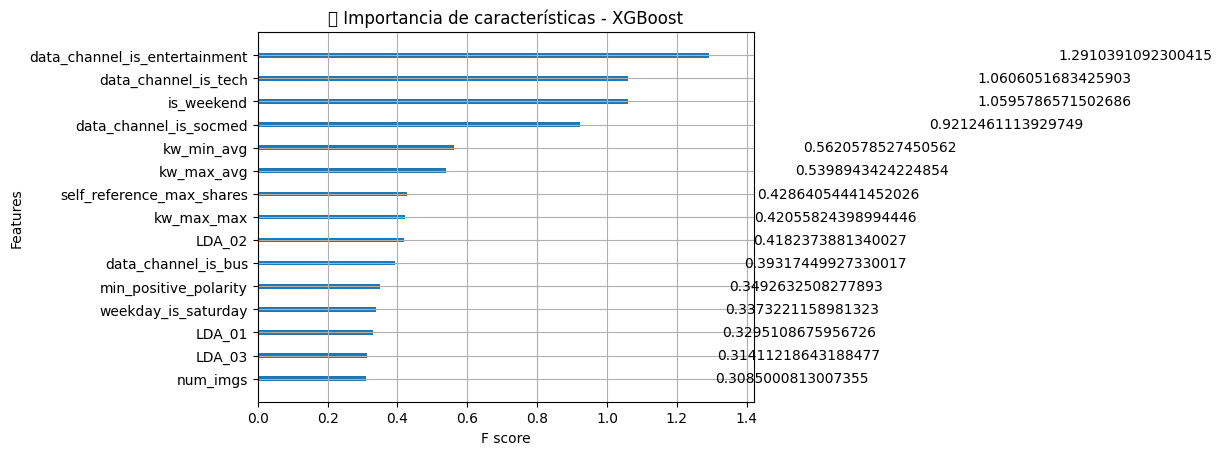

In [109]:
# 🎯 Mostrar gráficamente la importancia de características
plt.figure(figsize=(10, 6))
xgb.plot_importance(best_xgb_model, importance_type='gain', max_num_features=15)
plt.title("🎯 Importancia de características - XGBoost")
plt.tight_layout()
plt.show()

### 🔍 Importancia de características según XGBoost

El gráfico anterior muestra las características más relevantes utilizadas por el modelo XGBoost, ordenadas según su **F score** (frecuencia con la que se usaron en los árboles del modelo).

#### 🏆 Principales variables más influyentes:

1. **data_channel_is_entertainment** – 1.29  
   El modelo detecta que el canal de entretenimiento es el predictor más utilizado, lo que indica su fuerte relación con el número de compartidos.

2. **data_channel_is_tech** – 1.06  
   El canal de tecnología también aporta significativamente al modelo.

3. **is_weekend** – 1.06  
   La variable que indica si la publicación se realizó en fin de semana es un factor importante, probablemente por el comportamiento distinto de los usuarios durante esos días.

4. **data_channel_is_socmed** – 0.92  
   Las publicaciones en canales de redes sociales tienen un gran peso predictivo.

5. **kw_min_avg** y **kw_max_avg** – ~0.56 y 0.54  
   Estos valores relacionados con el contenido de las palabras clave también resultan relevantes.

#### 🧠 Comentario:
El modelo confía fuertemente en variables categóricas binarias (como canales de publicación y días de la semana) para hacer sus predicciones. Esto sugiere que el **contexto y canal de difusión** de una noticia puede ser más determinante para su viralidad que otras métricas numéricas.

📌 Esta información es útil para entender **cómo y por qué** el modelo toma decisiones, lo cual es clave para justificar sus predicciones y mejorar interpretabilidad.


###🥇🥇 Bagging con modelos heterogéneos y evaluación en conjunto de test

In [114]:
# 📥 Importar función de bagging desde archivo util_bagging.py
import util_bagging as ubagging                              # Importa funciones utilitarias para bagging


In [124]:
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

In [129]:
def bagging_het(X_train, y_train, T, estimators, X_test):
    all_predictions = []

    for i in tqdm(range(T), desc="Iterando bagging"):
        preds_por_iteracion = []

        # Bootstrap sample
        X_sample, y_sample = resample(X_train, y_train)

        for est in estimators:
            model = est.__class__(**est.get_params())  # Clonar modelo
            model.fit(X_sample, y_sample)
            y_pred = model.predict(X_test)
            preds_por_iteracion.append(y_pred)

        # Promediar predicciones de los modelos en esta iteración
        promedio_iteracion = np.mean(preds_por_iteracion, axis=0)
        all_predictions.append(promedio_iteracion)

    # Promediar las T predicciones finales
    final_prediction = np.mean(all_predictions, axis=0)
    return final_prediction


In [130]:
# Lista de modelos heterogéneos
estimators = [
    DecisionTreeRegressor(),
    LinearRegression(),
    SVR()
]

# Número de iteraciones
T = 10

#  Ejecutar el bagging y obtener predicciones
y_pred_bag = bagging_het(X_train, y_train, T, estimators, X_test)


Iterando bagging:   0%|          | 0/10 [00:00<?, ?it/s]

In [131]:
# 📈 Calcular métricas de evaluación

rmse_bag = sqrt(mean_squared_error(y_test, y_pred_bag))     # Calcula RMSE
r2_bag = r2_score(y_test, y_pred_bag)                        # Calcula R²

print(f"📊 RMSE (Bagging): {rmse_bag:.4f}")
print(f"📈 R² (Bagging): {r2_bag:.4f}")


📊 RMSE (Bagging): 0.1875
📈 R² (Bagging): 0.1200


## 🧪 Evaluación del Modelo de Bagging Heterogéneo

Tras entrenar un modelo de **Bagging con 3 estimadores heterogéneos** (`DecisionTreeRegressor`, `LinearRegression` y `SVR`) con 10 iteraciones, se obtuvieron los siguientes resultados sobre el conjunto de test:

- 📉 **RMSE (Root Mean Squared Error)**: `0.1875`  
  Esto indica que, en promedio, las predicciones del modelo difieren del valor real en aproximadamente **0.19 unidades**, lo cual refleja el error de predicción del modelo.

- 📈 **R² (Coeficiente de Determinación)**: `0.1200`  
  Esto significa que el modelo explica aproximadamente el **12% de la variabilidad** de los datos de salida respecto a la media. Si bien es una mejora sobre un modelo sin entrenamiento, su poder explicativo aún es limitado.

### 📌 Interpretación general:
Aunque el RMSE es relativamente bajo, el valor de R² sugiere que hay espacio para mejorar el modelo. Esto puede deberse a:

- Poca cantidad de iteraciones (`T=10`).
- Modelos base con bajo desempeño individual.
- Datos con alta complejidad o ruido.

Este modelo aún puede mejorar optimizando hiperparámetros o incluyendo otros estimadores más robustos.


In [132]:
# Comparar modelos en un DataFrame resumen
resultados = pd.DataFrame({
    'Modelo': ['Red Neuronal', 'XGBoost', 'Bagging Heterogéneo'],
    'RMSE': [rmse_nn, rmse_xgb, rmse_bag],                  # Asume que rmse_nn y rmse_xgb están definidos
    'R²': [r2_nn, r2_xgb, r2_bag]
})

resultados.sort_values('RMSE', ascending=True)              # Ordena por menor error


,Modelo,RMSE,R²
1,XGBoost,0.184875,0.144150
2,Bagging Heterogéneo,0.187462,0.120032
0,Red Neuronal,0.189004,0.105501


## 📊 Comparación de Modelos de Regresión

### 🔍 Interpretación:

- ✅ **XGBoost** obtuvo el **mejor desempeño general**, con el menor error cuadrático medio (RMSE = 0.1849) y el mayor poder explicativo (R² = 0.1442).
- 🧪 **Bagging Heterogéneo** logró un rendimiento intermedio, superando a la Red Neuronal en ambas métricas.
- ⚠️ **Red Neuronal** tuvo el peor desempeño entre los tres modelos, con el RMSE más alto (0.1890) y el menor R² (0.1055), indicando que explicó solo un 10.5% de la varianza.

### 📌 Conclusión:

Aunque todos los modelos lograron errores bajos, sus valores de R² indican que aún hay margen de mejora en la capacidad predictiva. En este escenario, **XGBoost sería el modelo preferido**, seguido de cerca por el modelo de **Bagging con estimadores heterogéneos**.
